In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import mean_squared_error

In [2]:
# show all column 
pd.set_option('display.max_column', None)
pd.set_option('display.max_row',None)

In [3]:
#read all three datas
df_train = pd.read_csv('TRAIN.csv')
df_test = pd.read_csv('TEST_FINAL.csv')
df_sub = pd.read_csv('SAMPLE.csv')

In [4]:
df_train.head()

ID  Store_id Store_Type Location_Type Region_Code        Date  \
0  T1000001         1         S1            L3          R1  2018-01-01   
1  T1000002       253         S4            L2          R1  2018-01-01   
2  T1000003       252         S3            L2          R1  2018-01-01   
3  T1000004       251         S2            L3          R1  2018-01-01   
4  T1000005       250         S2            L3          R4  2018-01-01   

   Holiday Discount  #Order     Sales  
0        1      Yes       9   7011.84  
1        1      Yes      60  51789.12  
2        1      Yes      42  36868.20  
3        1      Yes      23  19715.16  
4        1      Yes      62  45614.52

In [5]:
# convert date column to Date format
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

In [6]:
# categorical Feature to Numerical Feature
df_train['Discount'] = df_train['Discount'].map({'Yes':1,'No':0})
df_test['Discount'] = df_test['Discount'].map({'Yes':1,'No':0})

In [7]:
df_train.head()

ID  Store_id Store_Type Location_Type Region_Code       Date  \
0  T1000001         1         S1            L3          R1 2018-01-01   
1  T1000002       253         S4            L2          R1 2018-01-01   
2  T1000003       252         S3            L2          R1 2018-01-01   
3  T1000004       251         S2            L3          R1 2018-01-01   
4  T1000005       250         S2            L3          R4 2018-01-01   

   Holiday  Discount  #Order     Sales  
0        1         1       9   7011.84  
1        1         1      60  51789.12  
2        1         1      42  36868.20  
3        1         1      23  19715.16  
4        1         1      62  45614.52

In [8]:
df_train['Sales'].head()

0     7011.84
1    51789.12
2    36868.20
3    19715.16
4    45614.52
Name: Sales, dtype: float64

In [9]:
# convert sales value data to ln (log base e) value 
df_train['Sales'] = np.log(df_train['Sales'].replace(0,1))
df_test['Sales'] = np.log(df_train['Sales'].replace(0,1))

In [10]:
df_train['Sales'].head()

0     8.855355
1    10.854935
2    10.515105
3     9.889143
4    10.727981
Name: Sales, dtype: float64

In [11]:
df_train.shape, df_test.shape, df_sub.shape

((188340, 10), (22265, 9), (22265, 2))

In [12]:
df_train.head()

ID  Store_id Store_Type Location_Type Region_Code       Date  \
0  T1000001         1         S1            L3          R1 2018-01-01   
1  T1000002       253         S4            L2          R1 2018-01-01   
2  T1000003       252         S3            L2          R1 2018-01-01   
3  T1000004       251         S2            L3          R1 2018-01-01   
4  T1000005       250         S2            L3          R4 2018-01-01   

   Holiday  Discount  #Order      Sales  
0        1         1       9   8.855355  
1        1         1      60  10.854935  
2        1         1      42  10.515105  
3        1         1      23   9.889143  
4        1         1      62  10.727981

In [13]:
df_test.head()

ID  Store_id Store_Type Location_Type Region_Code       Date  \
0  T1188341       171         S4            L2          R3 2019-06-01   
1  T1188342       172         S1            L1          R1 2019-06-01   
2  T1188343       173         S4            L2          R1 2019-06-01   
3  T1188344       174         S1            L1          R4 2019-06-01   
4  T1188345       170         S1            L1          R2 2019-06-01   

   Holiday  Discount     Sales  
0        0         0  2.181022  
1        0         0  2.384620  
2        0         0  2.352813  
3        0         0  2.291438  
4        0         0  2.372855

In [14]:
df = df_train.append(df_test.reset_index(drop= True))

In [15]:
df.shape

(210605, 10)

In [16]:
df.sort_values(['Store_id', 'Date'], inplace=True)

In [17]:
df.head()

ID  Store_id Store_Type Location_Type Region_Code       Date  \
0     T1000001         1         S1            L3          R1 2018-01-01   
607   T1000608         1         S1            L3          R1 2018-01-02   
1046  T1001047         1         S1            L3          R1 2018-01-03   
1207  T1001208         1         S1            L3          R1 2018-01-04   
1752  T1001753         1         S1            L3          R1 2018-01-05   

      Holiday  Discount  #Order      Sales  
0           1         1     9.0   8.855355  
607         0         1    60.0  10.654172  
1046        0         1    72.0  10.820518  
1207        0         1    64.0  10.700927  
1752        0         1    63.0  10.770672

### Calander and Holiday features

In [18]:
# make new holiday data with unique date 
holiday = df_train[['Date','Holiday']].drop_duplicates().reset_index(drop =True)

holiday = holiday.append(df_test[['Date','Holiday']].drop_duplicates().reset_index(drop = True))

In [19]:
holiday.head() , holiday.shape

(        Date  Holiday
 0 2018-01-01        1
 1 2018-01-02        0
 2 2018-01-03        0
 3 2018-01-04        0
 4 2018-01-05        0,
 (577, 2))

In [20]:
#sort dates and reset index value
holiday.sort_values(['Date'],inplace = True)
holiday.reset_index(drop = True, inplace = True)

In [21]:
print(holiday.shape)
holiday.head()

(577, 2)


Date  Holiday
0 2018-01-01        1
1 2018-01-02        0
2 2018-01-03        0
3 2018-01-04        0
4 2018-01-05        0

In [22]:
#new column added with year and month
holiday['YM'] = pd.to_datetime(holiday['Date'].dt.year.astype(str) + "-" + holiday['Date'].dt.month.astype(str))

In [23]:
# holiday.tail(20)

In [24]:
holiday['Year'] = holiday['Date'].dt.year
holiday['Month'] = holiday['Date'].dt.month
holiday['Day'] = holiday['Date'].dt.day
holiday['DayofWeek'] = holiday['Date'].dt.dayofweek
holiday['WeekofYear'] = holiday['Date'].dt.weekofyear
holiday['Quarter'] = holiday['Date'].dt.quarter

<ipython-input-24-5696004a3a02>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  holiday['WeekofYear'] = holiday['Date'].dt.weekofyear


In [25]:
holiday.head()

Date  Holiday         YM  Year  Month  Day  DayofWeek  WeekofYear  \
0 2018-01-01        1 2018-01-01  2018      1    1          0           1   
1 2018-01-02        0 2018-01-01  2018      1    2          1           1   
2 2018-01-03        0 2018-01-01  2018      1    3          2           1   
3 2018-01-04        0 2018-01-01  2018      1    4          3           1   
4 2018-01-05        0 2018-01-01  2018      1    5          4           1   

   Quarter  
0        1  
1        1  
2        1  
3        1  
4        1

In [26]:
# count total no of holiday in this months
x = holiday.groupby(['YM'])[['Holiday']].sum()
x.columns = ['holidays_in_month']
x = x.reset_index()
holiday = pd.merge(holiday, x, on='YM', how='left')

In [27]:
holiday.head()

Date  Holiday         YM  Year  Month  Day  DayofWeek  WeekofYear  \
0 2018-01-01        1 2018-01-01  2018      1    1          0           1   
1 2018-01-02        0 2018-01-01  2018      1    2          1           1   
2 2018-01-03        0 2018-01-01  2018      1    3          2           1   
3 2018-01-04        0 2018-01-01  2018      1    4          3           1   
4 2018-01-05        0 2018-01-01  2018      1    5          4           1   

   Quarter  holidays_in_month  
0        1                  5  
1        1                  5  
2        1                  5  
3        1                  5  
4        1                  5

In [28]:
def get_next_holidays_in_days(x):
    t = holiday[(holiday['Date'] > x) & (holiday['Holiday'] == 1)]
    if t.shape[0] == 0:
        return -1
    else:
        return (t.iloc[0]['Date'] - x).days

In [32]:
def get_previous_holidays_in_days(x):
    t = holiday[(holiday['Date'] < x) & (holiday['Holiday'] == 1)]
    if t.shape[0] == 0:
        return -1
    else:
        return (x - t.iloc[-1]['Date']).days

In [33]:
holiday['day_in_next_holiday'] = holiday['Date'].apply(lambda x: get_next_holidays_in_days(x))

In [34]:
holiday['days_in_previous_holiday'] = holiday['Date'].apply(lambda x: get_previous_holidays_in_days(x))

In [35]:
holiday.head()

Date  Holiday         YM  Year  Month  Day  DayofWeek  WeekofYear  \
0 2018-01-01        1 2018-01-01  2018      1    1          0           1   
1 2018-01-02        0 2018-01-01  2018      1    2          1           1   
2 2018-01-03        0 2018-01-01  2018      1    3          2           1   
3 2018-01-04        0 2018-01-01  2018      1    4          3           1   
4 2018-01-05        0 2018-01-01  2018      1    5          4           1   

   Quarter  holidays_in_month  day_in_next_holiday  days_in_previous_holiday  
0        1                  5                   13                        -1  
1        1                  5                   12                         1  
2        1                  5                   11                         2  
3        1                  5                   10                         3  
4        1                  5                    9                         4

### Store ID related region-location type- store type features

In [36]:
#drop duplicates in store_id
stores = df_train[['Store_id', 'Region_Code', 'Location_Type', 'Store_Type']].drop_duplicates().reset_index(drop=True)

In [37]:
print(stores.shape)
stores.head()

(365, 4)


Store_id Region_Code Location_Type Store_Type
0         1          R1            L3         S1
1       253          R1            L2         S4
2       252          R1            L2         S3
3       251          R1            L3         S2
4       250          R4            L3         S2

In [38]:
# count region wise stores
stores.groupby(['Region_Code'])[['Store_id']].count()

Store_id
Region_Code          
R1                124
R2                105
R3                 86
R4                 50

In [39]:
x = stores.groupby(['Region_Code'])[['Store_id']].count()
x.columns = ['Num_stores_in_region']
x = x.reset_index()

# merge store data with x
stores = pd.merge(stores, x, on='Region_Code', how='left')

In [40]:
# count region and location wise stores
stores.groupby(['Region_Code', 'Location_Type'])[['Store_id']].count()

Store_id
Region_Code Location_Type          
R1          L1                   51
            L2                   38
            L3                   17
            L4                    6
            L5                   12
R2          L1                   48
            L2                   21
            L3                   18
            L4                    9
            L5                    9
R3          L1                   40
            L2                   23
            L3                   17
            L4                    4
            L5                    2
R4          L1                   26
            L2                   12
            L3                    6
            L4                    2
            L5                    4

In [41]:
x = stores.groupby(['Region_Code', 'Location_Type'])[['Store_id']].count()
x.columns = ['Num_stores_of_same_loc_type_in_region']
x = x.reset_index()

# merge store data to x 
stores = pd.merge(stores, x, on=['Region_Code', 'Location_Type'], how='left')

In [42]:
#count region and store type
stores_df.groupby(['Region_Code', 'Store_Type'])[['Store_id']].count()

NameError: name 'stores_df' is not defined

In [43]:
x = stores.groupby(['Region_Code', 'Store_Type'])[['Store_id']].count()
x.columns = ['Num_stores_of_same_store_type_in_region']
x = x.reset_index()
stores = pd.merge(stores, x, on=['Region_Code', 'Store_Type'], how='left')

In [44]:
stores.head()

Store_id Region_Code Location_Type Store_Type  Num_stores_in_region  \
0         1          R1            L3         S1                   124   
1       253          R1            L2         S4                   124   
2       252          R1            L2         S3                   124   
3       251          R1            L3         S2                   124   
4       250          R4            L3         S2                    50   

   Num_stores_of_same_loc_type_in_region  \
0                                     17   
1                                     38   
2                                     38   
3                                     17   
4                                      6   

   Num_stores_of_same_store_type_in_region  
0                                       41  
1                                       54  
2                                       18  
3                                       11  
4                                       13

In [50]:
# 
stores.groupby(['Region_Code', 'Location_Type', 'Store_Type'])[['Store_id']].count()

Store_id
Region_Code Location_Type Store_Type          
R1          L1            S1                17
                          S2                 2
                          S3                11
                          S4                21
            L2            S1                 1
                          S3                 4
                          S4                33
            L3            S1                13
                          S2                 1
                          S3                 3
            L4            S1                 6
            L5            S1                 4
                          S2                 8
R2          L1            S1                35
                          S2                 3
                          S3                 7
                          S4                 3
            L2            S1                 6
                          S3                 2
                          S4                13
            L3            S1                13
                          S2                 5
            L4            S1                 3
                          S2                 6
            L5            S1                 3
                          S2                 6
R3          L1            S1                29
                          S2                 2
                          S3                 7
                          S4                 2
            L2            S1                 4
                          S3                 7
                          S4                12
            L3            S1                 9
                          S2                 7
                          S3                 1
            L4            S1                 3
                          S2                 1
            L5            S2                 2
R4          L1            S1                22
                          S2                 2
                          S3                 1
                          S4                 1
            L2            S1                 3
                          S3                 5
                          S4                 4
            L3            S1                 1
                          S2                 5
            L4            S2                 2
            L5            S2                 4

In [51]:
x = stores.groupby(['Region_Code', 'Location_Type', 'Store_Type'])[['Store_id']].count()
x.columns = ['Num_stores_of_same_store_type_in_region_loc']
x = x.reset_index()
stores = pd.merge(stores, x, on=['Region_Code', 'Location_Type', 'Store_Type'], how='left')

In [52]:
stores.head()

Store_id Region_Code Location_Type Store_Type  Num_stores_in_region  \
0         1          R1            L3         S1                   124   
1       253          R1            L2         S4                   124   
2       252          R1            L2         S3                   124   
3       251          R1            L3         S2                   124   
4       250          R4            L3         S2                    50   

   Num_stores_of_same_loc_type_in_region  \
0                                     17   
1                                     38   
2                                     38   
3                                     17   
4                                      6   

   Num_stores_of_same_store_type_in_region  \
0                                       41   
1                                       54   
2                                       18   
3                                       11   
4                                       13   

   Num_stores_of_same_store_type_in_region_loc_x  \
0                                             13   
1                                             33   
2                                              4   
3                                              1   
4                                              5   

   Num_stores_of_same_store_type_in_region_loc_y  
0                                             13  
1                                             33  
2                                              4  
3                                              1  
4                                              5

### Discount related variables for each store-region-location type-store type

In [53]:
df['YM'] = pd.to_datetime(df['Date'].dt.year.astype(str) + "-" + df['Date'].dt.month.astype(str))

In [54]:
df.head()

ID  Store_id Store_Type Location_Type Region_Code       Date  \
0     T1000001         1         S1            L3          R1 2018-01-01   
607   T1000608         1         S1            L3          R1 2018-01-02   
1046  T1001047         1         S1            L3          R1 2018-01-03   
1207  T1001208         1         S1            L3          R1 2018-01-04   
1752  T1001753         1         S1            L3          R1 2018-01-05   

      Holiday  Discount  #Order      Sales         YM  
0           1         1     9.0   8.855355 2018-01-01  
607         0         1    60.0  10.654172 2018-01-01  
1046        0         1    72.0  10.820518 2018-01-01  
1207        0         1    64.0  10.700927 2018-01-01  
1752        0         1    63.0  10.770672 2018-01-01

In [55]:
# region location store type date  Vs Discount
df.groupby(['Region_Code', 'Location_Type', 'Store_Type', 'Date'])[['Discount']].sum()

Discount
Region_Code Location_Type Store_Type Date                
R1          L1            S1         2018-01-01        17
                                     2018-01-02        17
                                     2018-01-03        17
                                     2018-01-04        17
                                     2018-01-05        17
                                     2018-01-06         0
                                     2018-01-07         0
                                     2018-01-08         0
                                     2018-01-09         0
                                     2018-01-10         0
                                     2018-01-11         0
                                     2018-01-12         0
                                     2018-01-13        17
                                     2018-01-14        17
                                     2018-01-15        17
                                     2018-01-16        17
                                     2018-01-17        17
                                     2018-01-18         0
                                     2018-01-19         0
                                     2018-01-20         0
                                     2018-01-21         0
                                     2018-01-22         0
                                     2018-01-23         0
                                     2018-01-24         0
                                     2018-01-25        17
                                     2018-01-26        17
                                     2018-01-27        17
                                     2018-01-28        17
                                     2018-01-29        17
                                     2018-01-30         0
                                     2018-01-31         0
                                     2018-02-01         0
                                     2018-02-02         0
                                     2018-02-03         0
                                     2018-02-04         0
                                     2018-02-05         0
                                     2018-02-06        17
                                     2018-02-07        17
                                     2018-02-08        17
                                     2018-02-09        17
                                     2018-02-10        17
                                     2018-02-11         0
                                     2018-02-12         0
                                     2018-02-13         0
                                     2018-02-14         0
                                     2018-02-15         0
                                     2018-02-16         0
                                     2018-02-17         0
                                     2018-02-18        17
                                     2018-02-19        17
                                     2018-02-20        17
                                     2018-02-21        17
                                     2018-02-22         0
                                     2018-02-23         0
                                     2018-02-24         0
                                     2018-02-25         0
                                     2018-02-26         0
                                     2018-02-27         0
                                     2018-02-28        17
                                     2018-03-01        17
                                     2018-03-02        17
                                     2018-03-03        17
                                     2018-03-04        17
                                     2018-03-05         0
                                     2018-03-06         0
                                     2018-03-07         0
                                     2018-03-08         0
                                     2018-03-09

In [56]:
x = df.groupby(['Region_Code', 'Location_Type', 'Store_Type', 'Date'])[['Discount']].sum()
x.columns = ['num_stores_with_disc_in_same_store_loc_region']
x = x.reset_index()

# merge df with x
df = pd.merge(df, x, on=['Region_Code', 'Location_Type', 'Store_Type', 'Date'], how='left')

In [57]:
#count Region Location Date Vs Discount
df.groupby(['Region_Code', 'Location_Type', 'Date'])[['Discount']].sum()

Discount
Region_Code Location_Type Date                
R1          L1            2018-01-01        51
                          2018-01-02        51
                          2018-01-03        51
                          2018-01-04        51
                          2018-01-05        51
                          2018-01-06         0
                          2018-01-07         0
                          2018-01-08         0
                          2018-01-09         0
                          2018-01-10         0
                          2018-01-11         0
                          2018-01-12         0
                          2018-01-13        50
                          2018-01-14        50
                          2018-01-15        51
                          2018-01-16        51
                          2018-01-17        51
                          2018-01-18         1
                          2018-01-19         1
                          2018-01-20         0
                          2018-01-21         0
                          2018-01-22         0
                          2018-01-23         0
                          2018-01-24         0
                          2018-01-25        50
                          2018-01-26        50
                          2018-01-27        50
                          2018-01-28        50
                          2018-01-29        51
                          2018-01-30         1
                          2018-01-31         1
                          2018-02-01         1
                          2018-02-02         1
                          2018-02-03         0
                          2018-02-04         0
                          2018-02-05         0
                          2018-02-06        50
                          2018-02-07        50
                          2018-02-08        50
                          2018-02-09        50
                          2018-02-10        50
                          2018-02-11         0
                          2018-02-12         1
                          2018-02-13         1
                          2018-02-14         1
                          2018-02-15         1
                          2018-02-16         1
                          2018-02-17         0
                          2018-02-18        50
                          2018-02-19        50
                          2018-02-20        50
                          2018-02-21        50
                          2018-02-22         6
                          2018-02-23         0
                          2018-02-24         0
                          2018-02-25         0
                          2018-02-26         1
                          2018-02-27         1
                          2018-02-28        45
                          2018-03-01        51
                          2018-03-02        51
                          2018-03-03        50
                          2018-03-04        50
                          2018-03-05         6
                          2018-03-06         0
                          2018-03-07         0
                          2018-03-08         0
                          2018-03-09         0
                          2018-03-10         0
                          2018-03-11        44
                          2018-03-12        51
                          2018-03-13        51
                          2018-03-14        51
                          2018-03-15        51
                          2018-03-16         7
                          2018-03-17        44
                          2018-03-18        50
                          2018-03-19        50
                          2018-03-20        50
                          2018-03-21         6
                          2018-03-22         0
                          2018-03-23         0
                          2018-03-24         0
                          2018-03-25       

In [58]:
x = df.groupby(['Region_Code', 'Location_Type', 'Date'])[['Discount']].sum()
x.columns = ['num_stores_with_disc_in_same_loc_region']
x = x.reset_index()

df = pd.merge(df, x, on=['Region_Code', 'Location_Type', 'Date'], how='left')

In [59]:
df.groupby(['Region_Code', 'Date'])[['Discount']].sum()

Discount
Region_Code Date                
R1          2018-01-01       124
            2018-01-02       124
            2018-01-03       124
            2018-01-04       124
            2018-01-05       124
            2018-01-06         0
            2018-01-07         0
            2018-01-08         0
            2018-01-09         0
            2018-01-10         0
            2018-01-11         0
            2018-01-12         0
            2018-01-13       123
            2018-01-14       123
            2018-01-15       124
            2018-01-16       124
            2018-01-17       124
            2018-01-18         1
            2018-01-19         1
            2018-01-20         0
            2018-01-21         0
            2018-01-22         0
            2018-01-23         0
            2018-01-24         0
            2018-01-25       123
            2018-01-26       123
            2018-01-27       123
            2018-01-28       123
            2018-01-29       124
            2018-01-30         1
            2018-01-31         1
            2018-02-01         1
            2018-02-02         1
            2018-02-03         0
            2018-02-04         0
            2018-02-05         0
            2018-02-06       123
            2018-02-07       123
            2018-02-08       123
            2018-02-09       123
            2018-02-10       123
            2018-02-11         0
            2018-02-12         1
            2018-02-13         1
            2018-02-14         1
            2018-02-15         1
            2018-02-16         1
            2018-02-17         0
            2018-02-18       123
            2018-02-19       123
            2018-02-20       123
            2018-02-21       123
            2018-02-22        25
            2018-02-23         0
            2018-02-24         0
            2018-02-25         0
            2018-02-26         1
            2018-02-27         1
            2018-02-28        99
            2018-03-01       124
            2018-03-02       124
            2018-03-03       123
            2018-03-04       123
            2018-03-05        25
            2018-03-06         0
            2018-03-07         0
            2018-03-08         0
            2018-03-09         0
            2018-03-10         0
            2018-03-11        98
            2018-03-12       124
            2018-03-13       124
            2018-03-14       124
            2018-03-15       124
            2018-03-16        26
            2018-03-17        98
            2018-03-18       123
            2018-03-19       123
            2018-03-20       123
            2018-03-21        25
            2018-03-22         0
            2018-03-23         0
            2018-03-24         0
            2018-03-25         0
            2018-03-26         1
            2018-03-27         1
            2018-03-28        99
            2018-03-29       124
            2018-03-30       124
            2018-03-31       123
            2018-04-01       123
            2018-04-02        26
            2018-04-03         1
            2018-04-04         1
            2018-04-05         1
            2018-04-06         0
            2018-04-07         0
            2018-04-08        98
            2018-04-09       123
            2018-04-10       123
            2018-04-11       123
            2018-04-12        25
            2018-04-13         0
            2018-04-14         0
            2018-04-15         1
            2018-04-16         1
            2018-04-17         1
            2018-04-18         1
            2018-04-19        99
            2018-04-20       123
            2018-04-21       123
            2018-04-22       123
            2018-04-23       123
            2018-04-24        25
            2018-04-25         0
            2018-04-26         0
            2018-04-27         0
            2018-04-28         0
            2018-04-29         1
            2018-04-30         

In [60]:
x = df.groupby(['Region_Code', 'Date'])[['Discount']].sum()
x.columns = ['num_stores_with_disc_in_same_region']
x = x.reset_index()

# mergse df to x
df = pd.merge(df, x, on=['Region_Code', 'Date'], how='left')

In [61]:
x = df.groupby(['Store_id', 'YM'])[['Discount']].sum()
x.columns = ['discounts_in_month']
x = x.reset_index()
df = pd.merge(df, x, on=['Store_id', 'YM'], how='left')

x = df.groupby(['Region_Code', 'Location_Type', 'Store_Type', 'YM'])[['Discount']].sum()
x.columns = ['discounts_in_month_same_store_location_region']
x = x.reset_index()
df = pd.merge(df, x, on=['Region_Code', 'Location_Type', 'Store_Type', 'YM'], how='left')

x = df.groupby(['Region_Code', 'Location_Type', 'YM'])[['Discount']].sum()
x.columns = ['discounts_in_month_same_location_region']
x = x.reset_index()
df = pd.merge(df, x, on=['Region_Code', 'Location_Type', 'YM'], how='left')

x = df.groupby(['Region_Code', 'YM'])[['Discount']].sum()
x.columns = ['discounts_in_month_same_region']
x = x.reset_index()
df = pd.merge(df, x, on=['Region_Code', 'YM'], how='left')

In [62]:
df['days_in_next_discount'] = df['Date']
df.loc[df['Discount'] == 0, 'days_in_next_discount'] = np.nan
df['days_in_next_discount'] = df.groupby(['Store_id'])['days_in_next_discount'].shift(-1).fillna(method='bfill')
df['days_in_next_discount'] = (df['days_in_next_discount'] - df['Date']).dt.days
df.loc[df['days_in_next_discount'] <=0, 'days_in_next_discount'] = -1

In [63]:
df['days_in_previous_discount'] = df['Date']
df.loc[df['Discount'] == 0, 'days_in_previous_discount'] = np.nan
df['days_in_previous_discount'] = df.groupby(['Store_id'])['days_in_previous_discount'].shift(1).fillna(method='ffill')
df['days_in_previous_discount'] = (df['Date'] - df['days_in_previous_discount']).dt.days
df.loc[df['days_in_previous_discount'] <=0, 'days_in_previous_discount'] = -1

In [64]:
df['days_in_next_discount'].fillna(-1, inplace=True)
df['days_in_previous_discount'].fillna(-1, inplace=True)

In [65]:
df.head()

ID  Store_id Store_Type Location_Type Region_Code       Date  \
0  T1000001         1         S1            L3          R1 2018-01-01   
1  T1000608         1         S1            L3          R1 2018-01-02   
2  T1001047         1         S1            L3          R1 2018-01-03   
3  T1001208         1         S1            L3          R1 2018-01-04   
4  T1001753         1         S1            L3          R1 2018-01-05   

   Holiday  Discount  #Order      Sales         YM  \
0        1         1     9.0   8.855355 2018-01-01   
1        0         1    60.0  10.654172 2018-01-01   
2        0         1    72.0  10.820518 2018-01-01   
3        0         1    64.0  10.700927 2018-01-01   
4        0         1    63.0  10.770672 2018-01-01   

   num_stores_with_disc_in_same_store_loc_region  \
0                                             13   
1                                             13   
2                                             13   
3                                             13   
4                                             13   

   num_stores_with_disc_in_same_loc_region  \
0                                       17   
1                                       17   
2                                       17   
3                                       17   
4                                       17   

   num_stores_with_disc_in_same_region  discounts_in_month  \
0                                  124                  15   
1                                  124                  15   
2                                  124                  15   
3                                  124                  15   
4                                  124                  15   

   discounts_in_month_same_store_location_region  \
0                                            195   
1                                            195   
2                                            195   
3                                            195   
4                                            195   

   discounts_in_month_same_location_region  discounts_in_month_same_region  \
0                                      255                            1858   
1                                      255                            1858   
2                                      255                            1858   
3                                      255                            1858   
4                                      255                            1858   

   days_in_next_discount  days_in_previous_discount  
0                    1.0                       -1.0  
1                    1.0                        1.0  
2                    1.0                        1.0  
3                    1.0                        1.0  
4                    8.0                        1.0

## Sales and #Orders related time series variables

In [66]:
df.head()

ID  Store_id Store_Type Location_Type Region_Code       Date  \
0  T1000001         1         S1            L3          R1 2018-01-01   
1  T1000608         1         S1            L3          R1 2018-01-02   
2  T1001047         1         S1            L3          R1 2018-01-03   
3  T1001208         1         S1            L3          R1 2018-01-04   
4  T1001753         1         S1            L3          R1 2018-01-05   

   Holiday  Discount  #Order      Sales         YM  \
0        1         1     9.0   8.855355 2018-01-01   
1        0         1    60.0  10.654172 2018-01-01   
2        0         1    72.0  10.820518 2018-01-01   
3        0         1    64.0  10.700927 2018-01-01   
4        0         1    63.0  10.770672 2018-01-01   

   num_stores_with_disc_in_same_store_loc_region  \
0                                             13   
1                                             13   
2                                             13   
3                                             13   
4                                             13   

   num_stores_with_disc_in_same_loc_region  \
0                                       17   
1                                       17   
2                                       17   
3                                       17   
4                                       17   

   num_stores_with_disc_in_same_region  discounts_in_month  \
0                                  124                  15   
1                                  124                  15   
2                                  124                  15   
3                                  124                  15   
4                                  124                  15   

   discounts_in_month_same_store_location_region  \
0                                            195   
1                                            195   
2                                            195   
3                                            195   
4                                            195   

   discounts_in_month_same_location_region  discounts_in_month_same_region  \
0                                      255                            1858   
1                                      255                            1858   
2                                      255                            1858   
3                                      255                            1858   
4                                      255                            1858   

   days_in_next_discount  days_in_previous_discount  
0                    1.0                       -1.0  
1                    1.0                        1.0  
2                    1.0                        1.0  
3                    1.0                        1.0  
4                    8.0                        1.0

In [67]:
# Features constructed from previous sales values

#Creating sales lag features
def create_sales_lag_feats(df, gpby_cols, target_col, lags):
    gpby = df.groupby(gpby_cols)
    for i in lags:
        df['_'.join([target_col, 'lag', str(i)])] = \
                gpby[target_col].shift(i).values + np.random.normal(scale=1.6, size=(len(df),))
    return df


# Creating sales rolling mean features
def create_sales_rmean_feats(df, gpby_cols, target_col, windows, min_periods=2, 
                             shift=1, win_type=None):
    gpby = df.groupby(gpby_cols)
    for w in windows:
        df['_'.join([target_col, 'rmean', str(w)])] = \
            gpby[target_col].shift(shift).rolling(window=w, 
                                                  min_periods=min_periods,
                                                  win_type=win_type).mean().values +\
            np.random.normal(scale=1.6, size=(len(df),))
    return df


# Creating sales rolling median features
def create_sales_rmed_feats(df, gpby_cols, target_col, windows, min_periods=2, 
                            shift=1, win_type=None):
    gpby = df.groupby(gpby_cols)
    for w in windows:
        df['_'.join([target_col, 'rmed', str(w)])] = \
            gpby[target_col].shift(shift).rolling(window=w, 
                                                  min_periods=min_periods,
                                                  win_type=win_type).median().values +\
            np.random.normal(scale=1.6, size=(len(df),))
    return df

# Creating sales exponentially weighted mean features
def create_sales_ewm_feats(df, gpby_cols, target_col, alpha=[0.9], shift=[1]):
    gpby = df.groupby(gpby_cols)
    for a in alpha:
        for s in shift:
            df['_'.join([target_col, 'lag', str(s), 'ewm', str(a)])] = \
                gpby[target_col].shift(s).ewm(alpha=a).mean().values
    return df

In [68]:
del holiday['YM']
del holiday['Holiday']
del stores['Location_Type']
del stores['Region_Code']
del stores['Store_Type']

In [71]:
df = pd.merge(df, holiday, on='Date', how='left')
df = pd.merge(df, stores, on='Store_id', how='left')

In [72]:
df.head()

ID  Store_id Store_Type Location_Type Region_Code       Date  \
0  T1000001         1         S1            L3          R1 2018-01-01   
1  T1000608         1         S1            L3          R1 2018-01-02   
2  T1001047         1         S1            L3          R1 2018-01-03   
3  T1001208         1         S1            L3          R1 2018-01-04   
4  T1001753         1         S1            L3          R1 2018-01-05   

   Holiday  Discount  #Order      Sales         YM  \
0        1         1     9.0   8.855355 2018-01-01   
1        0         1    60.0  10.654172 2018-01-01   
2        0         1    72.0  10.820518 2018-01-01   
3        0         1    64.0  10.700927 2018-01-01   
4        0         1    63.0  10.770672 2018-01-01   

   num_stores_with_disc_in_same_store_loc_region  \
0                                             13   
1                                             13   
2                                             13   
3                                             13   
4                                             13   

   num_stores_with_disc_in_same_loc_region  \
0                                       17   
1                                       17   
2                                       17   
3                                       17   
4                                       17   

   num_stores_with_disc_in_same_region  discounts_in_month  \
0                                  124                  15   
1                                  124                  15   
2                                  124                  15   
3                                  124                  15   
4                                  124                  15   

   discounts_in_month_same_store_location_region  \
0                                            195   
1                                            195   
2                                            195   
3                                            195   
4                                            195   

   discounts_in_month_same_location_region  discounts_in_month_same_region  \
0                                      255                            1858   
1                                      255                            1858   
2                                      255                            1858   
3                                      255                            1858   
4                                      255                            1858   

   days_in_next_discount  days_in_previous_discount  Year  Month  Day  \
0                    1.0                       -1.0  2018      1    1   
1                    1.0                        1.0  2018      1    2   
2                    1.0                        1.0  2018      1    3   
3                    1.0                        1.0  2018      1    4   
4                    8.0                        1.0  2018      1    5   

   DayofWeek  WeekofYear  Quarter  holidays_in_month  day_in_next_holiday  \
0          0           1        1                  5                   13   
1          1           1        1                  5                   12   
2          2           1        1                  5                   11   
3          3           1        1                  5                   10   
4          4           1        1                  5                    9   

   days_in_previous_holiday  Num_stores_in_region  \
0                        -1                   124   
1                         1                   124   
2                         2                   124   
3                         3                   124   
4                         4                   124   

   Num_stores_of_same_loc_type_in_region  \
0                                     17   
1                                     17   
2                                     17   
3                                     17   
4                                     17   

   Num_stores_

In [73]:
# # Creating num_orders lag, rolling mean, rolling median, ohe features of the above train set
df = create_sales_lag_feats(df, gpby_cols=['Store_id'], target_col='Sales', 
                               lags=[61,62,63,64,65,66,67,74,80])

df = create_sales_ewm_feats(df, gpby_cols=['Store_id'], 
                               target_col='Sales', 
                               alpha=[0.95, 0.9, 0.8, 0.7, 0.6, 0.5], 
                               shift=[61,62,63,64,65,66,67,74,80])

In [74]:
df = create_sales_ewm_feats(df, gpby_cols=['Store_id'], 
                               target_col='#Order', 
                               alpha=[0.95, 0.9, 0.8, 0.7, 0.6, 0.5], 
                               shift=[61,62,63,64,65,66,67,74,80])

In [75]:
df.shape

(210605, 151)

In [77]:
df.tail()

ID  Store_id Store_Type Location_Type Region_Code       Date  \
210600  T1209045       365         S2            L1          R2 2019-07-27   
210601  T1209362       365         S2            L1          R2 2019-07-28   
210602  T1209520       365         S2            L1          R2 2019-07-29   
210603  T1210031       365         S2            L1          R2 2019-07-30   
210604  T1210605       365         S2            L1          R2 2019-07-31   

        Holiday  Discount  #Order     Sales         YM  \
210600        0         0     NaN  2.345070 2019-07-01   
210601        0         0     NaN  2.399835 2019-07-01   
210602        0         0     NaN  2.338184 2019-07-01   
210603        0         0     NaN  2.371191 2019-07-01   
210604        0         0     NaN  2.176713 2019-07-01   

        num_stores_with_disc_in_same_store_loc_region  \
210600                                              0   
210601                                              0   
210602                                              0   
210603                                              0   
210604                                              0   

        num_stores_with_disc_in_same_loc_region  \
210600                                       15   
210601                                        5   
210602                                        4   
210603                                        2   
210604                                        3   

        num_stores_with_disc_in_same_region  discounts_in_month  \
210600                                   29                  12   
210601                                   13                  12   
210602                                   10                  12   
210603                                    4                  12   
210604                                    7                  12   

        discounts_in_month_same_store_location_region  \
210600                                             40   
210601                                             40   
210602                                             40   
210603                                             40   
210604                                             40   

        discounts_in_month_same_location_region  \
210600                                      654   
210601                                      654   
210602                                      654   
210603                                      654   
210604                                      654   

        discounts_in_month_same_region  days_in_next_discount  \
210600                            1415                   -1.0   
210601                            1415                   -1.0   
210602                            1415                   -1.0   
210603                            1415                   -1.0   
210604                            1415                   -1.0   

        days_in_previous_discount  Year  Month  Day  DayofWeek  WeekofYear  \
210600                        2.0  2019      7   27          5          30   
210601                        3.0  2019      7   28          6          30   
210602                        4.0  2019      7   29          0          31   
210603                        5.0  2019      7   30          1          31   
210604                        6.0  2019      7   31          2          31   

        Quarter  holidays_in_month  day_in_next_holiday  \
210600        3                  1                   -1   
210601        3                  1                   -1   
210602        3                  1                   -1   
210603        3                  1                   -1   
210604        3                  1                   -1   

        days_in_previous_holiday  Num_stores_in_region  \
210600                        23                   105   
210601                        24                   105   
210602                        25                   105   
210603                        26              

## Model Data

In [78]:
df['data_type'] = np.nan
df.loc[df['Date'] >= '2019-06-01', 'data_type'] = 'test'
df.loc[(df['YM'] == '2019-05-01') | (df['YM'] == '2018-07-01'), 'data_type'] = 'valid'
df['data_type'] = df['data_type'].fillna('train')

In [79]:
df['data_type'].value_counts()

train    165710
valid     22630
test      22265
Name: data_type, dtype: int64

In [80]:
trn_df = df[df['data_type'] == 'train']
val_df = df[df['data_type'] == 'valid']
test_df = df[df['data_type'] == 'test']

In [81]:
avoid_cols = ['ID','Date','#Order', 'Sales', 'YM', 'data_type']
feats = [c for c in trn_df.columns if c not in avoid_cols]
target = 'Sales'

In [82]:
len(feats)

146

In [83]:
cat_cols = ['Store_id',
 'Store_Type',
 'Location_Type',
 'Region_Code',
 'Month',
 'Day',
 'DayOfWeek',
 'Quarter',    
    ]

In [84]:
cat_inds = [i for i,c in enumerate(feats) if c in cat_cols]

In [85]:
import catboost as cb

In [86]:
val_pool = cb.Pool(val_df[feats].values, val_df[target], cat_features=cat_inds)

In [87]:
cat_rg1 = cb.CatBoostRegressor(iterations=3000, learning_rate=0.06, depth=8, loss_function='RMSE', random_seed=42, l2_leaf_reg=10, od_type='Iter', od_wait=400, use_best_model=True)

In [88]:
cat_rg1.fit(X=trn_df[feats], y=trn_df[target], eval_set=val_pool, cat_features=cat_inds, use_best_model=True, verbose=True, plot=False)

0:	learn: 0.4600717	test: 0.4223578	best: 0.4223578 (0)	total: 418ms	remaining: 20m 53s
1:	learn: 0.4436445	test: 0.4087306	best: 0.4087306 (1)	total: 665ms	remaining: 16m 37s
2:	learn: 0.4281640	test: 0.3963995	best: 0.3963995 (2)	total: 860ms	remaining: 14m 19s
3:	learn: 0.4132332	test: 0.3873377	best: 0.3873377 (3)	total: 1.11s	remaining: 13m 55s
4:	learn: 0.3997722	test: 0.3777797	best: 0.3777797 (4)	total: 1.35s	remaining: 13m 26s
5:	learn: 0.3872671	test: 0.3690271	best: 0.3690271 (5)	total: 1.54s	remaining: 12m 49s
6:	learn: 0.3756968	test: 0.3621276	best: 0.3621276 (6)	total: 1.75s	remaining: 12m 27s
7:	learn: 0.3651996	test: 0.3536050	best: 0.3536050 (7)	total: 2s	remaining: 12m 26s
8:	learn: 0.3553494	test: 0.3465642	best: 0.3465642 (8)	total: 2.22s	remaining: 12m 17s
9:	learn: 0.3461731	test: 0.3390622	best: 0.3390622 (9)	total: 2.46s	remaining: 12m 16s
10:	learn: 0.3375692	test: 0.3317408	best: 0.3317408 (10)	total: 2.7s	remaining: 12m 14s
11:	learn: 0.3299397	test: 0.32513

92:	learn: 0.2181933	test: 0.2177448	best: 0.2177448 (92)	total: 24.8s	remaining: 12m 54s
93:	learn: 0.2179563	test: 0.2177327	best: 0.2177327 (93)	total: 25.1s	remaining: 12m 54s
94:	learn: 0.2173187	test: 0.2172325	best: 0.2172325 (94)	total: 25.4s	remaining: 12m 56s
95:	learn: 0.2171481	test: 0.2172673	best: 0.2172325 (94)	total: 25.7s	remaining: 12m 57s
96:	learn: 0.2170647	test: 0.2172168	best: 0.2172168 (96)	total: 26s	remaining: 12m 58s
97:	learn: 0.2161925	test: 0.2166433	best: 0.2166433 (97)	total: 26.3s	remaining: 12m 59s
98:	learn: 0.2160095	test: 0.2165695	best: 0.2165695 (98)	total: 26.6s	remaining: 13m
99:	learn: 0.2158966	test: 0.2165464	best: 0.2165464 (99)	total: 26.9s	remaining: 13m
100:	learn: 0.2157669	test: 0.2167069	best: 0.2165464 (99)	total: 27.2s	remaining: 13m
101:	learn: 0.2154470	test: 0.2168467	best: 0.2165464 (99)	total: 27.5s	remaining: 13m 1s
102:	learn: 0.2151771	test: 0.2161331	best: 0.2161331 (102)	total: 27.8s	remaining: 13m 3s
103:	learn: 0.2150384	

182:	learn: 0.2013520	test: 0.2087809	best: 0.2086412 (172)	total: 52.6s	remaining: 13m 29s
183:	learn: 0.2012333	test: 0.2087768	best: 0.2086412 (172)	total: 52.9s	remaining: 13m 29s
184:	learn: 0.2011344	test: 0.2087291	best: 0.2086412 (172)	total: 53.2s	remaining: 13m 30s
185:	learn: 0.2010792	test: 0.2087227	best: 0.2086412 (172)	total: 53.5s	remaining: 13m 30s
186:	learn: 0.2010255	test: 0.2086957	best: 0.2086412 (172)	total: 53.9s	remaining: 13m 30s
187:	learn: 0.2009645	test: 0.2086928	best: 0.2086412 (172)	total: 54.2s	remaining: 13m 30s
188:	learn: 0.2009170	test: 0.2086750	best: 0.2086412 (172)	total: 54.5s	remaining: 13m 30s
189:	learn: 0.2008255	test: 0.2086417	best: 0.2086412 (172)	total: 54.7s	remaining: 13m 29s
190:	learn: 0.2006726	test: 0.2086198	best: 0.2086198 (190)	total: 55.1s	remaining: 13m 29s
191:	learn: 0.2005646	test: 0.2086459	best: 0.2086198 (190)	total: 55.4s	remaining: 13m 29s
192:	learn: 0.2004367	test: 0.2086337	best: 0.2086198 (190)	total: 55.6s	remaini

271:	learn: 0.1915701	test: 0.2054159	best: 0.2052399 (263)	total: 1m 19s	remaining: 13m 14s
272:	learn: 0.1915140	test: 0.2054008	best: 0.2052399 (263)	total: 1m 19s	remaining: 13m 13s
273:	learn: 0.1913913	test: 0.2054625	best: 0.2052399 (263)	total: 1m 19s	remaining: 13m 13s
274:	learn: 0.1913414	test: 0.2054480	best: 0.2052399 (263)	total: 1m 20s	remaining: 13m 13s
275:	learn: 0.1911257	test: 0.2055518	best: 0.2052399 (263)	total: 1m 20s	remaining: 13m 13s
276:	learn: 0.1910474	test: 0.2055423	best: 0.2052399 (263)	total: 1m 20s	remaining: 13m 13s
277:	learn: 0.1910287	test: 0.2055451	best: 0.2052399 (263)	total: 1m 20s	remaining: 13m 13s
278:	learn: 0.1907752	test: 0.2053725	best: 0.2052399 (263)	total: 1m 21s	remaining: 13m 13s
279:	learn: 0.1906976	test: 0.2053347	best: 0.2052399 (263)	total: 1m 21s	remaining: 13m 13s
280:	learn: 0.1906829	test: 0.2053345	best: 0.2052399 (263)	total: 1m 21s	remaining: 13m 12s
281:	learn: 0.1905805	test: 0.2052150	best: 0.2052150 (281)	total: 1m 

360:	learn: 0.1848236	test: 0.2028768	best: 0.2028768 (360)	total: 1m 45s	remaining: 12m 52s
361:	learn: 0.1846969	test: 0.2027025	best: 0.2027025 (361)	total: 1m 46s	remaining: 12m 52s
362:	learn: 0.1845865	test: 0.2027296	best: 0.2027025 (361)	total: 1m 46s	remaining: 12m 52s
363:	learn: 0.1845216	test: 0.2027067	best: 0.2027025 (361)	total: 1m 46s	remaining: 12m 52s
364:	learn: 0.1844935	test: 0.2027082	best: 0.2027025 (361)	total: 1m 46s	remaining: 12m 52s
365:	learn: 0.1844498	test: 0.2027044	best: 0.2027025 (361)	total: 1m 47s	remaining: 12m 51s
366:	learn: 0.1844295	test: 0.2027185	best: 0.2027025 (361)	total: 1m 47s	remaining: 12m 51s
367:	learn: 0.1844112	test: 0.2027182	best: 0.2027025 (361)	total: 1m 47s	remaining: 12m 51s
368:	learn: 0.1843847	test: 0.2027134	best: 0.2027025 (361)	total: 1m 48s	remaining: 12m 50s
369:	learn: 0.1842202	test: 0.2026103	best: 0.2026103 (369)	total: 1m 48s	remaining: 12m 50s
370:	learn: 0.1841688	test: 0.2026091	best: 0.2026091 (370)	total: 1m 

449:	learn: 0.1790266	test: 0.2005632	best: 0.2005037 (445)	total: 2m 12s	remaining: 12m 30s
450:	learn: 0.1790077	test: 0.2005724	best: 0.2005037 (445)	total: 2m 12s	remaining: 12m 30s
451:	learn: 0.1789723	test: 0.2005810	best: 0.2005037 (445)	total: 2m 13s	remaining: 12m 30s
452:	learn: 0.1789295	test: 0.2005835	best: 0.2005037 (445)	total: 2m 13s	remaining: 12m 30s
453:	learn: 0.1788977	test: 0.2005983	best: 0.2005037 (445)	total: 2m 13s	remaining: 12m 29s
454:	learn: 0.1788126	test: 0.2006019	best: 0.2005037 (445)	total: 2m 14s	remaining: 12m 29s
455:	learn: 0.1787581	test: 0.2005855	best: 0.2005037 (445)	total: 2m 14s	remaining: 12m 29s
456:	learn: 0.1787395	test: 0.2005858	best: 0.2005037 (445)	total: 2m 14s	remaining: 12m 28s
457:	learn: 0.1786964	test: 0.2005900	best: 0.2005037 (445)	total: 2m 14s	remaining: 12m 28s
458:	learn: 0.1786742	test: 0.2005691	best: 0.2005037 (445)	total: 2m 15s	remaining: 12m 28s
459:	learn: 0.1786149	test: 0.2005622	best: 0.2005037 (445)	total: 2m 

538:	learn: 0.1735453	test: 0.2007901	best: 0.1999180 (495)	total: 2m 39s	remaining: 12m 6s
539:	learn: 0.1734923	test: 0.2007913	best: 0.1999180 (495)	total: 2m 39s	remaining: 12m 6s
540:	learn: 0.1734536	test: 0.2007791	best: 0.1999180 (495)	total: 2m 39s	remaining: 12m 6s
541:	learn: 0.1733478	test: 0.2008452	best: 0.1999180 (495)	total: 2m 40s	remaining: 12m 5s
542:	learn: 0.1731511	test: 0.2007287	best: 0.1999180 (495)	total: 2m 40s	remaining: 12m 5s
543:	learn: 0.1731481	test: 0.2007346	best: 0.1999180 (495)	total: 2m 40s	remaining: 12m 5s
544:	learn: 0.1731066	test: 0.2007476	best: 0.1999180 (495)	total: 2m 40s	remaining: 12m 4s
545:	learn: 0.1728560	test: 0.2004899	best: 0.1999180 (495)	total: 2m 41s	remaining: 12m 4s
546:	learn: 0.1728251	test: 0.2005050	best: 0.1999180 (495)	total: 2m 41s	remaining: 12m 4s
547:	learn: 0.1727995	test: 0.2004832	best: 0.1999180 (495)	total: 2m 41s	remaining: 12m 4s
548:	learn: 0.1727600	test: 0.2004796	best: 0.1999180 (495)	total: 2m 42s	remain

627:	learn: 0.1692606	test: 0.1993710	best: 0.1992784 (621)	total: 3m 5s	remaining: 11m 40s
628:	learn: 0.1691456	test: 0.1993623	best: 0.1992784 (621)	total: 3m 5s	remaining: 11m 40s
629:	learn: 0.1690929	test: 0.1993863	best: 0.1992784 (621)	total: 3m 6s	remaining: 11m 40s
630:	learn: 0.1689973	test: 0.1993657	best: 0.1992784 (621)	total: 3m 6s	remaining: 11m 39s
631:	learn: 0.1689193	test: 0.1993535	best: 0.1992784 (621)	total: 3m 6s	remaining: 11m 39s
632:	learn: 0.1688669	test: 0.1993526	best: 0.1992784 (621)	total: 3m 7s	remaining: 11m 39s
633:	learn: 0.1688384	test: 0.1992514	best: 0.1992514 (633)	total: 3m 7s	remaining: 11m 39s
634:	learn: 0.1688299	test: 0.1992502	best: 0.1992502 (634)	total: 3m 7s	remaining: 11m 38s
635:	learn: 0.1687856	test: 0.1992560	best: 0.1992502 (634)	total: 3m 7s	remaining: 11m 38s
636:	learn: 0.1686552	test: 0.1991796	best: 0.1991796 (636)	total: 3m 8s	remaining: 11m 38s
637:	learn: 0.1686197	test: 0.1991856	best: 0.1991796 (636)	total: 3m 8s	remaini

716:	learn: 0.1653916	test: 0.2001058	best: 0.1990593 (651)	total: 3m 32s	remaining: 11m 17s
717:	learn: 0.1653601	test: 0.2001120	best: 0.1990593 (651)	total: 3m 33s	remaining: 11m 17s
718:	learn: 0.1653441	test: 0.2001063	best: 0.1990593 (651)	total: 3m 33s	remaining: 11m 16s
719:	learn: 0.1652863	test: 0.2000939	best: 0.1990593 (651)	total: 3m 33s	remaining: 11m 16s
720:	learn: 0.1652440	test: 0.2000857	best: 0.1990593 (651)	total: 3m 33s	remaining: 11m 16s
721:	learn: 0.1651957	test: 0.2000699	best: 0.1990593 (651)	total: 3m 34s	remaining: 11m 15s
722:	learn: 0.1651452	test: 0.2000476	best: 0.1990593 (651)	total: 3m 34s	remaining: 11m 15s
723:	learn: 0.1651134	test: 0.2000595	best: 0.1990593 (651)	total: 3m 34s	remaining: 11m 15s
724:	learn: 0.1650923	test: 0.2000453	best: 0.1990593 (651)	total: 3m 35s	remaining: 11m 15s
725:	learn: 0.1650498	test: 0.2001065	best: 0.1990593 (651)	total: 3m 35s	remaining: 11m 14s
726:	learn: 0.1650400	test: 0.2000936	best: 0.1990593 (651)	total: 3m 

805:	learn: 0.1617845	test: 0.1987848	best: 0.1987848 (805)	total: 3m 59s	remaining: 10m 51s
806:	learn: 0.1617681	test: 0.1987810	best: 0.1987810 (806)	total: 3m 59s	remaining: 10m 50s
807:	learn: 0.1617395	test: 0.1987798	best: 0.1987798 (807)	total: 3m 59s	remaining: 10m 50s
808:	learn: 0.1617227	test: 0.1987783	best: 0.1987783 (808)	total: 4m	remaining: 10m 50s
809:	learn: 0.1616998	test: 0.1987820	best: 0.1987783 (808)	total: 4m	remaining: 10m 49s
810:	learn: 0.1616936	test: 0.1987856	best: 0.1987783 (808)	total: 4m	remaining: 10m 49s
811:	learn: 0.1616865	test: 0.1987921	best: 0.1987783 (808)	total: 4m	remaining: 10m 49s
812:	learn: 0.1616665	test: 0.1987730	best: 0.1987730 (812)	total: 4m 1s	remaining: 10m 48s
813:	learn: 0.1616277	test: 0.1987633	best: 0.1987633 (813)	total: 4m 1s	remaining: 10m 48s
814:	learn: 0.1616009	test: 0.1987648	best: 0.1987633 (813)	total: 4m 1s	remaining: 10m 48s
815:	learn: 0.1615920	test: 0.1987660	best: 0.1987633 (813)	total: 4m 2s	remaining: 10m 4

894:	learn: 0.1585739	test: 0.1990188	best: 0.1982851 (834)	total: 4m 25s	remaining: 10m 25s
895:	learn: 0.1585626	test: 0.1990211	best: 0.1982851 (834)	total: 4m 26s	remaining: 10m 24s
896:	learn: 0.1585588	test: 0.1990217	best: 0.1982851 (834)	total: 4m 26s	remaining: 10m 24s
897:	learn: 0.1585063	test: 0.1990892	best: 0.1982851 (834)	total: 4m 26s	remaining: 10m 24s
898:	learn: 0.1584802	test: 0.1990927	best: 0.1982851 (834)	total: 4m 26s	remaining: 10m 23s
899:	learn: 0.1584794	test: 0.1990937	best: 0.1982851 (834)	total: 4m 27s	remaining: 10m 23s
900:	learn: 0.1584625	test: 0.1990297	best: 0.1982851 (834)	total: 4m 27s	remaining: 10m 23s
901:	learn: 0.1584481	test: 0.1988071	best: 0.1982851 (834)	total: 4m 27s	remaining: 10m 23s
902:	learn: 0.1584364	test: 0.1988057	best: 0.1982851 (834)	total: 4m 28s	remaining: 10m 22s
903:	learn: 0.1583898	test: 0.1988030	best: 0.1982851 (834)	total: 4m 28s	remaining: 10m 22s
904:	learn: 0.1583488	test: 0.1988041	best: 0.1982851 (834)	total: 4m 

983:	learn: 0.1560383	test: 0.1984199	best: 0.1982851 (834)	total: 4m 53s	remaining: 10m
984:	learn: 0.1560226	test: 0.1984193	best: 0.1982851 (834)	total: 4m 53s	remaining: 10m
985:	learn: 0.1559650	test: 0.1982940	best: 0.1982851 (834)	total: 4m 53s	remaining: 10m
986:	learn: 0.1559140	test: 0.1983034	best: 0.1982851 (834)	total: 4m 54s	remaining: 9m 59s
987:	learn: 0.1559026	test: 0.1983043	best: 0.1982851 (834)	total: 4m 54s	remaining: 9m 59s
988:	learn: 0.1558670	test: 0.1983070	best: 0.1982851 (834)	total: 4m 54s	remaining: 9m 59s
989:	learn: 0.1557384	test: 0.1982129	best: 0.1982129 (989)	total: 4m 55s	remaining: 9m 59s
990:	learn: 0.1557367	test: 0.1982154	best: 0.1982129 (989)	total: 4m 55s	remaining: 9m 59s
991:	learn: 0.1556560	test: 0.1982075	best: 0.1982075 (991)	total: 4m 55s	remaining: 9m 58s
992:	learn: 0.1556261	test: 0.1981931	best: 0.1981931 (992)	total: 4m 56s	remaining: 9m 58s
993:	learn: 0.1555999	test: 0.1981967	best: 0.1981931 (992)	total: 4m 56s	remaining: 9m 5

1072:	learn: 0.1538168	test: 0.1972424	best: 0.1972424 (1072)	total: 5m 19s	remaining: 9m 33s
1073:	learn: 0.1538142	test: 0.1972402	best: 0.1972402 (1073)	total: 5m 19s	remaining: 9m 33s
1074:	learn: 0.1538009	test: 0.1972447	best: 0.1972402 (1073)	total: 5m 20s	remaining: 9m 33s
1075:	learn: 0.1537812	test: 0.1972217	best: 0.1972217 (1075)	total: 5m 20s	remaining: 9m 33s
1076:	learn: 0.1537468	test: 0.1971611	best: 0.1971611 (1076)	total: 5m 20s	remaining: 9m 32s
1077:	learn: 0.1537099	test: 0.1971333	best: 0.1971333 (1077)	total: 5m 21s	remaining: 9m 32s
1078:	learn: 0.1536868	test: 0.1970509	best: 0.1970509 (1078)	total: 5m 21s	remaining: 9m 32s
1079:	learn: 0.1536572	test: 0.1970444	best: 0.1970444 (1079)	total: 5m 21s	remaining: 9m 31s
1080:	learn: 0.1536313	test: 0.1970599	best: 0.1970444 (1079)	total: 5m 21s	remaining: 9m 31s
1081:	learn: 0.1536188	test: 0.1970567	best: 0.1970444 (1079)	total: 5m 22s	remaining: 9m 31s
1082:	learn: 0.1535920	test: 0.1970597	best: 0.1970444 (1079

1160:	learn: 0.1515191	test: 0.1960682	best: 0.1960682 (1160)	total: 5m 45s	remaining: 9m 7s
1161:	learn: 0.1515038	test: 0.1959295	best: 0.1959295 (1161)	total: 5m 46s	remaining: 9m 7s
1162:	learn: 0.1514854	test: 0.1959182	best: 0.1959182 (1162)	total: 5m 46s	remaining: 9m 7s
1163:	learn: 0.1514560	test: 0.1959087	best: 0.1959087 (1163)	total: 5m 46s	remaining: 9m 6s
1164:	learn: 0.1514237	test: 0.1959000	best: 0.1959000 (1164)	total: 5m 47s	remaining: 9m 6s
1165:	learn: 0.1514089	test: 0.1959020	best: 0.1959000 (1164)	total: 5m 47s	remaining: 9m 6s
1166:	learn: 0.1513323	test: 0.1958325	best: 0.1958325 (1166)	total: 5m 47s	remaining: 9m 6s
1167:	learn: 0.1512961	test: 0.1958446	best: 0.1958325 (1166)	total: 5m 47s	remaining: 9m 5s
1168:	learn: 0.1512497	test: 0.1958126	best: 0.1958126 (1168)	total: 5m 48s	remaining: 9m 5s
1169:	learn: 0.1512143	test: 0.1958200	best: 0.1958126 (1168)	total: 5m 48s	remaining: 9m 5s
1170:	learn: 0.1511689	test: 0.1958148	best: 0.1958126 (1168)	total: 5

1248:	learn: 0.1489797	test: 0.1953625	best: 0.1953625 (1248)	total: 6m 12s	remaining: 8m 42s
1249:	learn: 0.1489728	test: 0.1953633	best: 0.1953625 (1248)	total: 6m 13s	remaining: 8m 42s
1250:	learn: 0.1489519	test: 0.1953648	best: 0.1953625 (1248)	total: 6m 13s	remaining: 8m 41s
1251:	learn: 0.1489314	test: 0.1953653	best: 0.1953625 (1248)	total: 6m 13s	remaining: 8m 41s
1252:	learn: 0.1489242	test: 0.1953664	best: 0.1953625 (1248)	total: 6m 13s	remaining: 8m 41s
1253:	learn: 0.1488085	test: 0.1952906	best: 0.1952906 (1253)	total: 6m 14s	remaining: 8m 41s
1254:	learn: 0.1487258	test: 0.1952657	best: 0.1952657 (1254)	total: 6m 14s	remaining: 8m 40s
1255:	learn: 0.1486986	test: 0.1952578	best: 0.1952578 (1255)	total: 6m 14s	remaining: 8m 40s
1256:	learn: 0.1486747	test: 0.1952660	best: 0.1952578 (1255)	total: 6m 15s	remaining: 8m 40s
1257:	learn: 0.1485564	test: 0.1951968	best: 0.1951968 (1257)	total: 6m 15s	remaining: 8m 39s
1258:	learn: 0.1485220	test: 0.1951946	best: 0.1951946 (1258

1336:	learn: 0.1465141	test: 0.1948256	best: 0.1947570 (1324)	total: 6m 39s	remaining: 8m 17s
1337:	learn: 0.1464586	test: 0.1948460	best: 0.1947570 (1324)	total: 6m 39s	remaining: 8m 16s
1338:	learn: 0.1464194	test: 0.1948335	best: 0.1947570 (1324)	total: 6m 40s	remaining: 8m 16s
1339:	learn: 0.1464019	test: 0.1948072	best: 0.1947570 (1324)	total: 6m 40s	remaining: 8m 16s
1340:	learn: 0.1463906	test: 0.1948008	best: 0.1947570 (1324)	total: 6m 40s	remaining: 8m 15s
1341:	learn: 0.1463538	test: 0.1947867	best: 0.1947570 (1324)	total: 6m 41s	remaining: 8m 15s
1342:	learn: 0.1463304	test: 0.1947951	best: 0.1947570 (1324)	total: 6m 41s	remaining: 8m 15s
1343:	learn: 0.1463170	test: 0.1948009	best: 0.1947570 (1324)	total: 6m 41s	remaining: 8m 15s
1344:	learn: 0.1462968	test: 0.1948051	best: 0.1947570 (1324)	total: 6m 42s	remaining: 8m 14s
1345:	learn: 0.1462854	test: 0.1948074	best: 0.1947570 (1324)	total: 6m 42s	remaining: 8m 14s
1346:	learn: 0.1462748	test: 0.1948092	best: 0.1947570 (1324

1424:	learn: 0.1442579	test: 0.1944406	best: 0.1944258 (1416)	total: 7m 7s	remaining: 7m 52s
1425:	learn: 0.1442197	test: 0.1944369	best: 0.1944258 (1416)	total: 7m 7s	remaining: 7m 51s
1426:	learn: 0.1442099	test: 0.1944377	best: 0.1944258 (1416)	total: 7m 7s	remaining: 7m 51s
1427:	learn: 0.1441914	test: 0.1944696	best: 0.1944258 (1416)	total: 7m 8s	remaining: 7m 51s
1428:	learn: 0.1441804	test: 0.1944725	best: 0.1944258 (1416)	total: 7m 8s	remaining: 7m 50s
1429:	learn: 0.1441640	test: 0.1944754	best: 0.1944258 (1416)	total: 7m 8s	remaining: 7m 50s
1430:	learn: 0.1441473	test: 0.1944757	best: 0.1944258 (1416)	total: 7m 8s	remaining: 7m 50s
1431:	learn: 0.1441375	test: 0.1944740	best: 0.1944258 (1416)	total: 7m 9s	remaining: 7m 49s
1432:	learn: 0.1441077	test: 0.1942504	best: 0.1942504 (1432)	total: 7m 9s	remaining: 7m 49s
1433:	learn: 0.1440929	test: 0.1942481	best: 0.1942481 (1433)	total: 7m 9s	remaining: 7m 49s
1434:	learn: 0.1440817	test: 0.1942463	best: 0.1942463 (1434)	total: 7

1512:	learn: 0.1423490	test: 0.1941729	best: 0.1940955 (1459)	total: 7m 34s	remaining: 7m 26s
1513:	learn: 0.1423154	test: 0.1941773	best: 0.1940955 (1459)	total: 7m 34s	remaining: 7m 26s
1514:	learn: 0.1422804	test: 0.1941570	best: 0.1940955 (1459)	total: 7m 34s	remaining: 7m 25s
1515:	learn: 0.1421989	test: 0.1941109	best: 0.1940955 (1459)	total: 7m 35s	remaining: 7m 25s
1516:	learn: 0.1421782	test: 0.1940973	best: 0.1940955 (1459)	total: 7m 35s	remaining: 7m 25s
1517:	learn: 0.1421456	test: 0.1940889	best: 0.1940889 (1517)	total: 7m 35s	remaining: 7m 25s
1518:	learn: 0.1421294	test: 0.1940818	best: 0.1940818 (1518)	total: 7m 36s	remaining: 7m 24s
1519:	learn: 0.1421157	test: 0.1940867	best: 0.1940818 (1518)	total: 7m 36s	remaining: 7m 24s
1520:	learn: 0.1420980	test: 0.1940871	best: 0.1940818 (1518)	total: 7m 36s	remaining: 7m 24s
1521:	learn: 0.1420586	test: 0.1940877	best: 0.1940818 (1518)	total: 7m 37s	remaining: 7m 23s
1522:	learn: 0.1420124	test: 0.1940896	best: 0.1940818 (1518

1600:	learn: 0.1402824	test: 0.1935816	best: 0.1935520 (1572)	total: 8m 1s	remaining: 7m
1601:	learn: 0.1402195	test: 0.1935049	best: 0.1935049 (1601)	total: 8m 1s	remaining: 7m
1602:	learn: 0.1401763	test: 0.1934946	best: 0.1934946 (1602)	total: 8m 2s	remaining: 7m
1603:	learn: 0.1401430	test: 0.1934856	best: 0.1934856 (1603)	total: 8m 2s	remaining: 6m 59s
1604:	learn: 0.1401351	test: 0.1934856	best: 0.1934856 (1603)	total: 8m 2s	remaining: 6m 59s
1605:	learn: 0.1401173	test: 0.1934960	best: 0.1934856 (1603)	total: 8m 2s	remaining: 6m 59s
1606:	learn: 0.1400829	test: 0.1935193	best: 0.1934856 (1603)	total: 8m 3s	remaining: 6m 58s
1607:	learn: 0.1400627	test: 0.1935223	best: 0.1934856 (1603)	total: 8m 3s	remaining: 6m 58s
1608:	learn: 0.1400468	test: 0.1934936	best: 0.1934856 (1603)	total: 8m 3s	remaining: 6m 58s
1609:	learn: 0.1400395	test: 0.1934923	best: 0.1934856 (1603)	total: 8m 4s	remaining: 6m 58s
1610:	learn: 0.1400257	test: 0.1935689	best: 0.1934856 (1603)	total: 8m 4s	remaini

1688:	learn: 0.1386005	test: 0.1933018	best: 0.1933018 (1688)	total: 8m 28s	remaining: 6m 34s
1689:	learn: 0.1385871	test: 0.1932912	best: 0.1932912 (1689)	total: 8m 28s	remaining: 6m 34s
1690:	learn: 0.1385728	test: 0.1932933	best: 0.1932912 (1689)	total: 8m 28s	remaining: 6m 33s
1691:	learn: 0.1385553	test: 0.1930532	best: 0.1930532 (1691)	total: 8m 29s	remaining: 6m 33s
1692:	learn: 0.1385349	test: 0.1930579	best: 0.1930532 (1691)	total: 8m 29s	remaining: 6m 33s
1693:	learn: 0.1385134	test: 0.1930091	best: 0.1930091 (1693)	total: 8m 29s	remaining: 6m 32s
1694:	learn: 0.1384723	test: 0.1930079	best: 0.1930079 (1694)	total: 8m 30s	remaining: 6m 32s
1695:	learn: 0.1384577	test: 0.1929976	best: 0.1929976 (1695)	total: 8m 30s	remaining: 6m 32s
1696:	learn: 0.1384041	test: 0.1929946	best: 0.1929946 (1696)	total: 8m 30s	remaining: 6m 32s
1697:	learn: 0.1383949	test: 0.1929943	best: 0.1929943 (1697)	total: 8m 30s	remaining: 6m 31s
1698:	learn: 0.1383744	test: 0.1929971	best: 0.1929943 (1697

1776:	learn: 0.1371669	test: 0.1940488	best: 0.1929943 (1697)	total: 8m 55s	remaining: 6m 8s
1777:	learn: 0.1371508	test: 0.1940736	best: 0.1929943 (1697)	total: 8m 55s	remaining: 6m 7s
1778:	learn: 0.1371209	test: 0.1940736	best: 0.1929943 (1697)	total: 8m 55s	remaining: 6m 7s
1779:	learn: 0.1371138	test: 0.1940757	best: 0.1929943 (1697)	total: 8m 56s	remaining: 6m 7s
1780:	learn: 0.1370817	test: 0.1940740	best: 0.1929943 (1697)	total: 8m 56s	remaining: 6m 7s
1781:	learn: 0.1370461	test: 0.1940658	best: 0.1929943 (1697)	total: 8m 56s	remaining: 6m 6s
1782:	learn: 0.1370313	test: 0.1940670	best: 0.1929943 (1697)	total: 8m 56s	remaining: 6m 6s
1783:	learn: 0.1370212	test: 0.1940682	best: 0.1929943 (1697)	total: 8m 57s	remaining: 6m 6s
1784:	learn: 0.1370192	test: 0.1940660	best: 0.1929943 (1697)	total: 8m 57s	remaining: 6m 5s
1785:	learn: 0.1370117	test: 0.1942655	best: 0.1929943 (1697)	total: 8m 57s	remaining: 6m 5s
1786:	learn: 0.1369949	test: 0.1942553	best: 0.1929943 (1697)	total: 8

1864:	learn: 0.1354671	test: 0.1939615	best: 0.1929943 (1697)	total: 9m 22s	remaining: 5m 42s
1865:	learn: 0.1354436	test: 0.1939472	best: 0.1929943 (1697)	total: 9m 22s	remaining: 5m 41s
1866:	learn: 0.1354125	test: 0.1938364	best: 0.1929943 (1697)	total: 9m 22s	remaining: 5m 41s
1867:	learn: 0.1353882	test: 0.1938367	best: 0.1929943 (1697)	total: 9m 23s	remaining: 5m 41s
1868:	learn: 0.1353588	test: 0.1938143	best: 0.1929943 (1697)	total: 9m 23s	remaining: 5m 40s
1869:	learn: 0.1353288	test: 0.1938036	best: 0.1929943 (1697)	total: 9m 23s	remaining: 5m 40s
1870:	learn: 0.1353283	test: 0.1938055	best: 0.1929943 (1697)	total: 9m 23s	remaining: 5m 40s
1871:	learn: 0.1353211	test: 0.1938068	best: 0.1929943 (1697)	total: 9m 24s	remaining: 5m 39s
1872:	learn: 0.1353060	test: 0.1938101	best: 0.1929943 (1697)	total: 9m 24s	remaining: 5m 39s
1873:	learn: 0.1352412	test: 0.1938019	best: 0.1929943 (1697)	total: 9m 24s	remaining: 5m 39s
1874:	learn: 0.1352336	test: 0.1937998	best: 0.1929943 (1697

1952:	learn: 0.1339549	test: 0.1937164	best: 0.1929943 (1697)	total: 9m 49s	remaining: 5m 15s
1953:	learn: 0.1339301	test: 0.1937077	best: 0.1929943 (1697)	total: 9m 49s	remaining: 5m 15s
1954:	learn: 0.1339146	test: 0.1936989	best: 0.1929943 (1697)	total: 9m 49s	remaining: 5m 15s
1955:	learn: 0.1339053	test: 0.1936990	best: 0.1929943 (1697)	total: 9m 50s	remaining: 5m 14s
1956:	learn: 0.1338965	test: 0.1937011	best: 0.1929943 (1697)	total: 9m 50s	remaining: 5m 14s
1957:	learn: 0.1338825	test: 0.1937052	best: 0.1929943 (1697)	total: 9m 50s	remaining: 5m 14s
1958:	learn: 0.1338742	test: 0.1937041	best: 0.1929943 (1697)	total: 9m 50s	remaining: 5m 14s
1959:	learn: 0.1338696	test: 0.1937080	best: 0.1929943 (1697)	total: 9m 51s	remaining: 5m 13s
1960:	learn: 0.1338567	test: 0.1936862	best: 0.1929943 (1697)	total: 9m 51s	remaining: 5m 13s
1961:	learn: 0.1338554	test: 0.1936872	best: 0.1929943 (1697)	total: 9m 51s	remaining: 5m 13s
1962:	learn: 0.1338251	test: 0.1936837	best: 0.1929943 (1697

2040:	learn: 0.1325725	test: 0.1931276	best: 0.1929943 (1697)	total: 10m 15s	remaining: 4m 49s
2041:	learn: 0.1325670	test: 0.1931339	best: 0.1929943 (1697)	total: 10m 15s	remaining: 4m 48s
2042:	learn: 0.1325510	test: 0.1930778	best: 0.1929943 (1697)	total: 10m 16s	remaining: 4m 48s
2043:	learn: 0.1325427	test: 0.1930803	best: 0.1929943 (1697)	total: 10m 16s	remaining: 4m 48s
2044:	learn: 0.1325348	test: 0.1930859	best: 0.1929943 (1697)	total: 10m 16s	remaining: 4m 48s
2045:	learn: 0.1325060	test: 0.1930788	best: 0.1929943 (1697)	total: 10m 17s	remaining: 4m 47s
2046:	learn: 0.1324872	test: 0.1930885	best: 0.1929943 (1697)	total: 10m 17s	remaining: 4m 47s
2047:	learn: 0.1324746	test: 0.1930863	best: 0.1929943 (1697)	total: 10m 17s	remaining: 4m 47s
2048:	learn: 0.1324615	test: 0.1930871	best: 0.1929943 (1697)	total: 10m 18s	remaining: 4m 46s
2049:	learn: 0.1324585	test: 0.1931179	best: 0.1929943 (1697)	total: 10m 18s	remaining: 4m 46s
2050:	learn: 0.1324441	test: 0.1931265	best: 0.192

In [89]:
1000 * mean_squared_error(np.clip(cat_rg1.predict(val_df[feats]), a_min=0, a_max=None), val_df[target])

37.24681059304579

In [90]:
print("params : ", cat_rg1.get_params())
print("Learning rate: ", cat_rg1.learning_rate_)
print("tree counts: ", cat_rg1.tree_count_)

params :  {'iterations': 3000, 'learning_rate': 0.06, 'depth': 8, 'l2_leaf_reg': 10, 'loss_function': 'RMSE', 'od_wait': 400, 'od_type': 'Iter', 'random_seed': 42, 'use_best_model': True}
Learning rate:  0.05999999865889549
tree counts:  1698


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


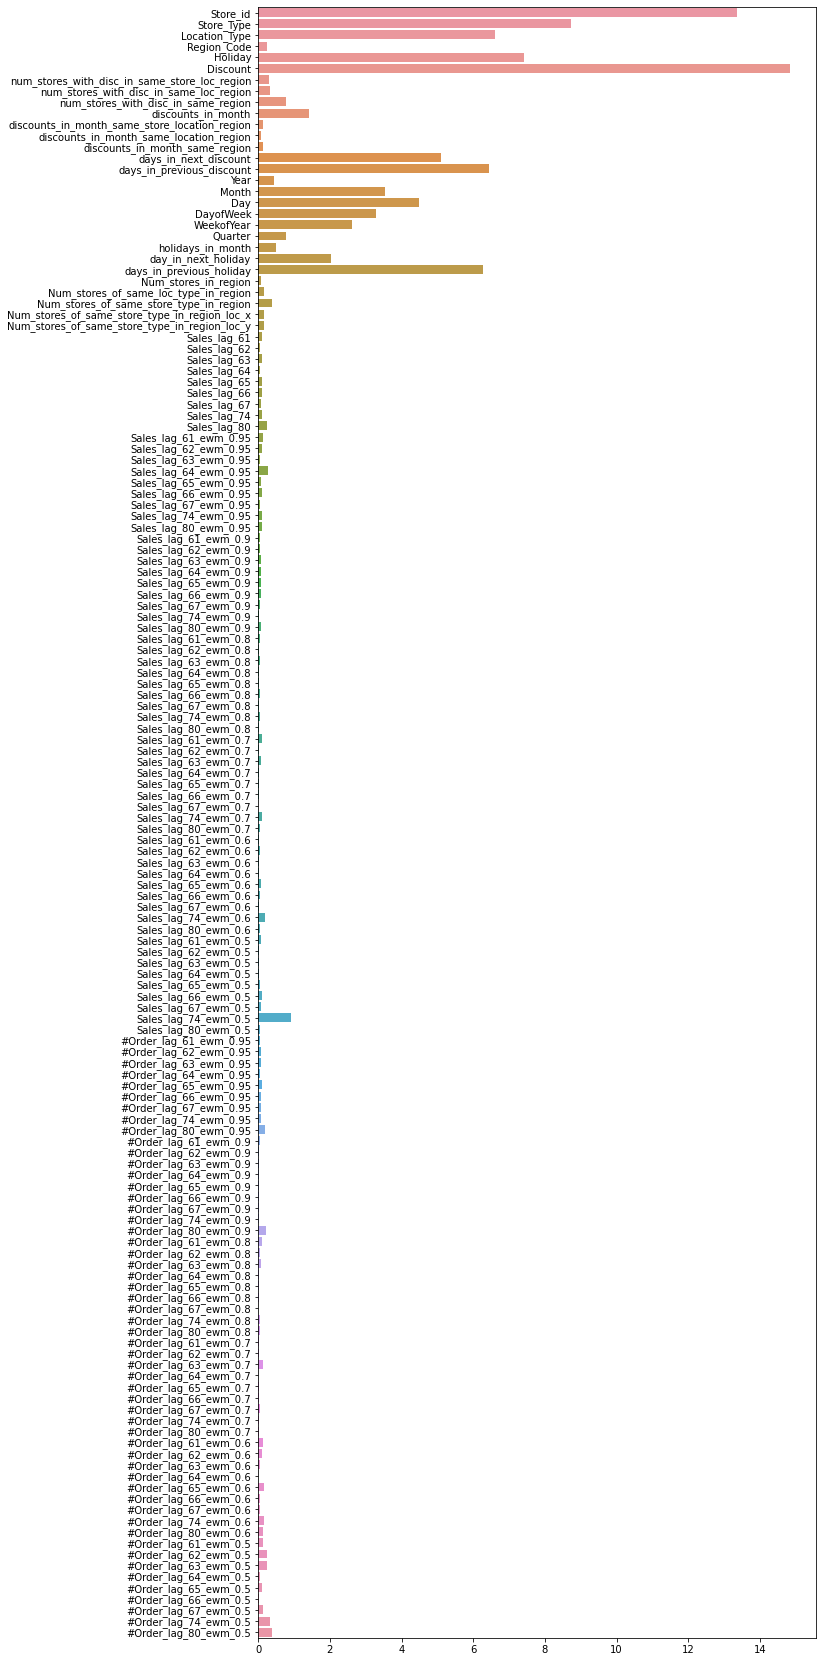

In [91]:
fig, ax = plt.subplots(figsize=(10, 30))
sns.barplot(cat_rg1.feature_importances_, feats, ax=ax)
plt.show()

### Final Model

In [92]:
final_trn_df = trn_df.append(val_df).reset_index(drop=True)

In [93]:
final_trn_df = final_trn_df[final_trn_df['Date'] > '2018-03-01']

In [94]:
cat_rg2 = cb.CatBoostRegressor(iterations=1200, learning_rate=0.08, depth=6, loss_function='RMSE', random_seed=42, l2_leaf_reg=10, od_type='Iter', od_wait=200, use_best_model=True)

In [95]:
cat_rg2.fit(X=final_trn_df[feats], y=final_trn_df[target], eval_set=val_pool, cat_features=cat_inds, use_best_model=True, verbose=True, plot=False)

0:	learn: 0.4599889	test: 0.4136726	best: 0.4136726 (0)	total: 165ms	remaining: 3m 18s
1:	learn: 0.4399818	test: 0.3977114	best: 0.3977114 (1)	total: 269ms	remaining: 2m 40s
2:	learn: 0.4222259	test: 0.3835738	best: 0.3835738 (2)	total: 382ms	remaining: 2m 32s
3:	learn: 0.4072447	test: 0.3705226	best: 0.3705226 (3)	total: 591ms	remaining: 2m 56s
4:	learn: 0.3926931	test: 0.3576132	best: 0.3576132 (4)	total: 789ms	remaining: 3m 8s
5:	learn: 0.3794577	test: 0.3472039	best: 0.3472039 (5)	total: 927ms	remaining: 3m 4s
6:	learn: 0.3691124	test: 0.3356636	best: 0.3356636 (6)	total: 1.12s	remaining: 3m 10s
7:	learn: 0.3581231	test: 0.3269198	best: 0.3269198 (7)	total: 1.26s	remaining: 3m 7s
8:	learn: 0.3481108	test: 0.3162094	best: 0.3162094 (8)	total: 1.46s	remaining: 3m 13s
9:	learn: 0.3405983	test: 0.3071613	best: 0.3071613 (9)	total: 1.61s	remaining: 3m 11s
10:	learn: 0.3319939	test: 0.2978323	best: 0.2978323 (10)	total: 1.82s	remaining: 3m 17s
11:	learn: 0.3252881	test: 0.2913478	best: 0

93:	learn: 0.2263062	test: 0.1848176	best: 0.1848176 (93)	total: 18s	remaining: 3m 32s
94:	learn: 0.2258538	test: 0.1845167	best: 0.1845167 (94)	total: 18.2s	remaining: 3m 32s
95:	learn: 0.2256633	test: 0.1843047	best: 0.1843047 (95)	total: 18.4s	remaining: 3m 31s
96:	learn: 0.2252546	test: 0.1841276	best: 0.1841276 (96)	total: 18.6s	remaining: 3m 31s
97:	learn: 0.2250523	test: 0.1839223	best: 0.1839223 (97)	total: 18.8s	remaining: 3m 31s
98:	learn: 0.2250130	test: 0.1838583	best: 0.1838583 (98)	total: 19s	remaining: 3m 31s
99:	learn: 0.2246876	test: 0.1835120	best: 0.1835120 (99)	total: 19.2s	remaining: 3m 31s
100:	learn: 0.2245469	test: 0.1833481	best: 0.1833481 (100)	total: 19.4s	remaining: 3m 31s
101:	learn: 0.2245464	test: 0.1833466	best: 0.1833466 (101)	total: 19.6s	remaining: 3m 30s
102:	learn: 0.2242698	test: 0.1823453	best: 0.1823453 (102)	total: 19.8s	remaining: 3m 30s
103:	learn: 0.2239384	test: 0.1822987	best: 0.1822987 (103)	total: 20s	remaining: 3m 30s
104:	learn: 0.22373

184:	learn: 0.2143285	test: 0.1731855	best: 0.1731855 (184)	total: 34s	remaining: 3m 6s
185:	learn: 0.2134372	test: 0.1721679	best: 0.1721679 (185)	total: 34.2s	remaining: 3m 6s
186:	learn: 0.2134369	test: 0.1721668	best: 0.1721668 (186)	total: 34.4s	remaining: 3m 6s
187:	learn: 0.2127986	test: 0.1714405	best: 0.1714405 (187)	total: 34.6s	remaining: 3m 6s
188:	learn: 0.2126315	test: 0.1712276	best: 0.1712276 (188)	total: 34.7s	remaining: 3m 5s
189:	learn: 0.2126314	test: 0.1712280	best: 0.1712276 (188)	total: 34.8s	remaining: 3m 5s
190:	learn: 0.2125889	test: 0.1712029	best: 0.1712029 (190)	total: 35s	remaining: 3m 5s
191:	learn: 0.2124214	test: 0.1710439	best: 0.1710439 (191)	total: 35.2s	remaining: 3m 4s
192:	learn: 0.2122674	test: 0.1708209	best: 0.1708209 (192)	total: 35.4s	remaining: 3m 4s
193:	learn: 0.2117158	test: 0.1703621	best: 0.1703621 (193)	total: 35.6s	remaining: 3m 4s
194:	learn: 0.2115348	test: 0.1697862	best: 0.1697862 (194)	total: 35.8s	remaining: 3m 4s
195:	learn: 0.

275:	learn: 0.2038252	test: 0.1630018	best: 0.1630018 (275)	total: 50.4s	remaining: 2m 48s
276:	learn: 0.2038249	test: 0.1630016	best: 0.1630016 (276)	total: 50.6s	remaining: 2m 48s
277:	learn: 0.2038246	test: 0.1630023	best: 0.1630016 (276)	total: 50.7s	remaining: 2m 48s
278:	learn: 0.2037563	test: 0.1629068	best: 0.1629068 (278)	total: 50.9s	remaining: 2m 48s
279:	learn: 0.2037127	test: 0.1628870	best: 0.1628870 (279)	total: 51.1s	remaining: 2m 47s
280:	learn: 0.2035980	test: 0.1628700	best: 0.1628700 (280)	total: 51.3s	remaining: 2m 47s
281:	learn: 0.2034771	test: 0.1628408	best: 0.1628408 (281)	total: 51.5s	remaining: 2m 47s
282:	learn: 0.2032463	test: 0.1627280	best: 0.1627280 (282)	total: 51.7s	remaining: 2m 47s
283:	learn: 0.2031814	test: 0.1626785	best: 0.1626785 (283)	total: 51.8s	remaining: 2m 47s
284:	learn: 0.2031813	test: 0.1626787	best: 0.1626785 (283)	total: 52s	remaining: 2m 46s
285:	learn: 0.2031518	test: 0.1626744	best: 0.1626744 (285)	total: 52.2s	remaining: 2m 46s
2

366:	learn: 0.1985637	test: 0.1589509	best: 0.1589494 (365)	total: 1m 6s	remaining: 2m 31s
367:	learn: 0.1985635	test: 0.1589494	best: 0.1589494 (365)	total: 1m 6s	remaining: 2m 30s
368:	learn: 0.1985634	test: 0.1589493	best: 0.1589493 (368)	total: 1m 6s	remaining: 2m 30s
369:	learn: 0.1984942	test: 0.1589371	best: 0.1589371 (369)	total: 1m 7s	remaining: 2m 30s
370:	learn: 0.1983512	test: 0.1588686	best: 0.1588686 (370)	total: 1m 7s	remaining: 2m 30s
371:	learn: 0.1983302	test: 0.1588693	best: 0.1588686 (370)	total: 1m 7s	remaining: 2m 30s
372:	learn: 0.1982399	test: 0.1587978	best: 0.1587978 (372)	total: 1m 7s	remaining: 2m 29s
373:	learn: 0.1982393	test: 0.1587974	best: 0.1587974 (373)	total: 1m 7s	remaining: 2m 29s
374:	learn: 0.1981730	test: 0.1587907	best: 0.1587907 (374)	total: 1m 7s	remaining: 2m 29s
375:	learn: 0.1981728	test: 0.1587907	best: 0.1587907 (375)	total: 1m 8s	remaining: 2m 29s
376:	learn: 0.1980776	test: 0.1587858	best: 0.1587858 (376)	total: 1m 8s	remaining: 2m 29s

456:	learn: 0.1939294	test: 0.1558493	best: 0.1558493 (456)	total: 1m 22s	remaining: 2m 14s
457:	learn: 0.1938772	test: 0.1558269	best: 0.1558269 (457)	total: 1m 22s	remaining: 2m 14s
458:	learn: 0.1938767	test: 0.1558257	best: 0.1558257 (458)	total: 1m 22s	remaining: 2m 13s
459:	learn: 0.1937953	test: 0.1558224	best: 0.1558224 (459)	total: 1m 23s	remaining: 2m 13s
460:	learn: 0.1937311	test: 0.1558197	best: 0.1558197 (460)	total: 1m 23s	remaining: 2m 13s
461:	learn: 0.1936527	test: 0.1557229	best: 0.1557229 (461)	total: 1m 23s	remaining: 2m 13s
462:	learn: 0.1936039	test: 0.1556484	best: 0.1556484 (462)	total: 1m 23s	remaining: 2m 13s
463:	learn: 0.1934943	test: 0.1555385	best: 0.1555385 (463)	total: 1m 23s	remaining: 2m 13s
464:	learn: 0.1934942	test: 0.1555390	best: 0.1555385 (463)	total: 1m 24s	remaining: 2m 12s
465:	learn: 0.1934938	test: 0.1555392	best: 0.1555385 (463)	total: 1m 24s	remaining: 2m 12s
466:	learn: 0.1933842	test: 0.1555385	best: 0.1555385 (466)	total: 1m 24s	remain

547:	learn: 0.1901145	test: 0.1537684	best: 0.1537682 (546)	total: 1m 38s	remaining: 1m 57s
548:	learn: 0.1900410	test: 0.1537517	best: 0.1537517 (548)	total: 1m 38s	remaining: 1m 57s
549:	learn: 0.1900186	test: 0.1537345	best: 0.1537345 (549)	total: 1m 39s	remaining: 1m 57s
550:	learn: 0.1899582	test: 0.1537022	best: 0.1537022 (550)	total: 1m 39s	remaining: 1m 56s
551:	learn: 0.1899489	test: 0.1536816	best: 0.1536816 (551)	total: 1m 39s	remaining: 1m 56s
552:	learn: 0.1898936	test: 0.1535995	best: 0.1535995 (552)	total: 1m 39s	remaining: 1m 56s
553:	learn: 0.1898935	test: 0.1535991	best: 0.1535991 (553)	total: 1m 39s	remaining: 1m 56s
554:	learn: 0.1898096	test: 0.1535964	best: 0.1535964 (554)	total: 1m 39s	remaining: 1m 56s
555:	learn: 0.1897512	test: 0.1535081	best: 0.1535081 (555)	total: 1m 40s	remaining: 1m 55s
556:	learn: 0.1897213	test: 0.1534972	best: 0.1534972 (556)	total: 1m 40s	remaining: 1m 55s
557:	learn: 0.1896389	test: 0.1533385	best: 0.1533385 (557)	total: 1m 40s	remain

637:	learn: 0.1855807	test: 0.1500610	best: 0.1500591 (636)	total: 1m 55s	remaining: 1m 41s
638:	learn: 0.1855308	test: 0.1498524	best: 0.1498524 (638)	total: 1m 55s	remaining: 1m 41s
639:	learn: 0.1854577	test: 0.1498488	best: 0.1498488 (639)	total: 1m 55s	remaining: 1m 41s
640:	learn: 0.1854220	test: 0.1498508	best: 0.1498488 (639)	total: 1m 55s	remaining: 1m 40s
641:	learn: 0.1853817	test: 0.1498417	best: 0.1498417 (641)	total: 1m 55s	remaining: 1m 40s
642:	learn: 0.1853606	test: 0.1498146	best: 0.1498146 (642)	total: 1m 55s	remaining: 1m 40s
643:	learn: 0.1852802	test: 0.1497530	best: 0.1497530 (643)	total: 1m 56s	remaining: 1m 40s
644:	learn: 0.1852015	test: 0.1495570	best: 0.1495570 (644)	total: 1m 56s	remaining: 1m 40s
645:	learn: 0.1851912	test: 0.1495566	best: 0.1495566 (645)	total: 1m 56s	remaining: 1m 39s
646:	learn: 0.1851076	test: 0.1494272	best: 0.1494272 (646)	total: 1m 56s	remaining: 1m 39s
647:	learn: 0.1850140	test: 0.1492169	best: 0.1492169 (647)	total: 1m 56s	remain

727:	learn: 0.1823341	test: 0.1469047	best: 0.1469047 (727)	total: 2m 11s	remaining: 1m 25s
728:	learn: 0.1823247	test: 0.1469043	best: 0.1469043 (728)	total: 2m 11s	remaining: 1m 25s
729:	learn: 0.1822727	test: 0.1468916	best: 0.1468916 (729)	total: 2m 12s	remaining: 1m 25s
730:	learn: 0.1822030	test: 0.1468787	best: 0.1468787 (730)	total: 2m 12s	remaining: 1m 24s
731:	learn: 0.1821865	test: 0.1468626	best: 0.1468626 (731)	total: 2m 12s	remaining: 1m 24s
732:	learn: 0.1821011	test: 0.1468356	best: 0.1468356 (732)	total: 2m 12s	remaining: 1m 24s
733:	learn: 0.1820986	test: 0.1468300	best: 0.1468300 (733)	total: 2m 12s	remaining: 1m 24s
734:	learn: 0.1820861	test: 0.1468164	best: 0.1468164 (734)	total: 2m 13s	remaining: 1m 24s
735:	learn: 0.1820378	test: 0.1468079	best: 0.1468079 (735)	total: 2m 13s	remaining: 1m 23s
736:	learn: 0.1820106	test: 0.1468002	best: 0.1468002 (736)	total: 2m 13s	remaining: 1m 23s
737:	learn: 0.1818557	test: 0.1466426	best: 0.1466426 (737)	total: 2m 13s	remain

818:	learn: 0.1789557	test: 0.1443968	best: 0.1443968 (818)	total: 2m 28s	remaining: 1m 9s
819:	learn: 0.1788877	test: 0.1443971	best: 0.1443968 (818)	total: 2m 28s	remaining: 1m 8s
820:	learn: 0.1788876	test: 0.1443968	best: 0.1443968 (820)	total: 2m 28s	remaining: 1m 8s
821:	learn: 0.1788712	test: 0.1443960	best: 0.1443960 (821)	total: 2m 29s	remaining: 1m 8s
822:	learn: 0.1788045	test: 0.1443847	best: 0.1443847 (822)	total: 2m 29s	remaining: 1m 8s
823:	learn: 0.1787918	test: 0.1443820	best: 0.1443820 (823)	total: 2m 29s	remaining: 1m 8s
824:	learn: 0.1787917	test: 0.1443821	best: 0.1443820 (823)	total: 2m 29s	remaining: 1m 7s
825:	learn: 0.1787459	test: 0.1443372	best: 0.1443372 (825)	total: 2m 29s	remaining: 1m 7s
826:	learn: 0.1787214	test: 0.1443136	best: 0.1443136 (826)	total: 2m 29s	remaining: 1m 7s
827:	learn: 0.1786820	test: 0.1442918	best: 0.1442918 (827)	total: 2m 30s	remaining: 1m 7s
828:	learn: 0.1786818	test: 0.1442919	best: 0.1442918 (827)	total: 2m 30s	remaining: 1m 7s

910:	learn: 0.1757879	test: 0.1425970	best: 0.1425970 (910)	total: 2m 45s	remaining: 52.5s
911:	learn: 0.1757246	test: 0.1425968	best: 0.1425968 (911)	total: 2m 45s	remaining: 52.3s
912:	learn: 0.1757244	test: 0.1425973	best: 0.1425968 (911)	total: 2m 45s	remaining: 52.1s
913:	learn: 0.1757115	test: 0.1425962	best: 0.1425962 (913)	total: 2m 45s	remaining: 51.9s
914:	learn: 0.1756889	test: 0.1425940	best: 0.1425940 (914)	total: 2m 46s	remaining: 51.7s
915:	learn: 0.1756685	test: 0.1425888	best: 0.1425888 (915)	total: 2m 46s	remaining: 51.6s
916:	learn: 0.1756544	test: 0.1425630	best: 0.1425630 (916)	total: 2m 46s	remaining: 51.4s
917:	learn: 0.1756475	test: 0.1425627	best: 0.1425627 (917)	total: 2m 46s	remaining: 51.2s
918:	learn: 0.1756053	test: 0.1425551	best: 0.1425551 (918)	total: 2m 46s	remaining: 51s
919:	learn: 0.1755734	test: 0.1425552	best: 0.1425551 (918)	total: 2m 47s	remaining: 50.8s
920:	learn: 0.1755381	test: 0.1425475	best: 0.1425475 (920)	total: 2m 47s	remaining: 50.7s
9

1001:	learn: 0.1722898	test: 0.1402978	best: 0.1402978 (1001)	total: 3m 2s	remaining: 36.1s
1002:	learn: 0.1722751	test: 0.1402777	best: 0.1402777 (1002)	total: 3m 2s	remaining: 35.9s
1003:	learn: 0.1722468	test: 0.1402580	best: 0.1402580 (1003)	total: 3m 3s	remaining: 35.7s
1004:	learn: 0.1722029	test: 0.1402246	best: 0.1402246 (1004)	total: 3m 3s	remaining: 35.5s
1005:	learn: 0.1721740	test: 0.1402194	best: 0.1402194 (1005)	total: 3m 3s	remaining: 35.4s
1006:	learn: 0.1721488	test: 0.1402192	best: 0.1402192 (1006)	total: 3m 3s	remaining: 35.2s
1007:	learn: 0.1721043	test: 0.1401665	best: 0.1401665 (1007)	total: 3m 3s	remaining: 35s
1008:	learn: 0.1721043	test: 0.1401665	best: 0.1401665 (1007)	total: 3m 3s	remaining: 34.8s
1009:	learn: 0.1720685	test: 0.1401645	best: 0.1401645 (1009)	total: 3m 4s	remaining: 34.6s
1010:	learn: 0.1719654	test: 0.1400257	best: 0.1400257 (1010)	total: 3m 4s	remaining: 34.5s
1011:	learn: 0.1719483	test: 0.1400206	best: 0.1400206 (1011)	total: 3m 4s	remaini

1090:	learn: 0.1695514	test: 0.1382878	best: 0.1382878 (1090)	total: 3m 19s	remaining: 19.9s
1091:	learn: 0.1695376	test: 0.1382856	best: 0.1382856 (1091)	total: 3m 19s	remaining: 19.7s
1092:	learn: 0.1695287	test: 0.1382838	best: 0.1382838 (1092)	total: 3m 19s	remaining: 19.5s
1093:	learn: 0.1694940	test: 0.1382803	best: 0.1382803 (1093)	total: 3m 19s	remaining: 19.4s
1094:	learn: 0.1694438	test: 0.1382686	best: 0.1382686 (1094)	total: 3m 20s	remaining: 19.2s
1095:	learn: 0.1694229	test: 0.1382482	best: 0.1382482 (1095)	total: 3m 20s	remaining: 19s
1096:	learn: 0.1693882	test: 0.1382419	best: 0.1382419 (1096)	total: 3m 20s	remaining: 18.8s
1097:	learn: 0.1693485	test: 0.1382399	best: 0.1382399 (1097)	total: 3m 20s	remaining: 18.6s
1098:	learn: 0.1693379	test: 0.1382382	best: 0.1382382 (1098)	total: 3m 20s	remaining: 18.5s
1099:	learn: 0.1692971	test: 0.1382334	best: 0.1382334 (1099)	total: 3m 21s	remaining: 18.3s
1100:	learn: 0.1692613	test: 0.1382192	best: 0.1382192 (1100)	total: 3m 

1179:	learn: 0.1665158	test: 0.1366268	best: 0.1366252 (1178)	total: 3m 36s	remaining: 3.67s
1180:	learn: 0.1664739	test: 0.1366024	best: 0.1366024 (1180)	total: 3m 36s	remaining: 3.48s
1181:	learn: 0.1663251	test: 0.1364031	best: 0.1364031 (1181)	total: 3m 36s	remaining: 3.3s
1182:	learn: 0.1662821	test: 0.1363826	best: 0.1363826 (1182)	total: 3m 36s	remaining: 3.12s
1183:	learn: 0.1662467	test: 0.1363682	best: 0.1363682 (1183)	total: 3m 37s	remaining: 2.93s
1184:	learn: 0.1662124	test: 0.1362861	best: 0.1362861 (1184)	total: 3m 37s	remaining: 2.75s
1185:	learn: 0.1661835	test: 0.1362840	best: 0.1362840 (1185)	total: 3m 37s	remaining: 2.57s
1186:	learn: 0.1661031	test: 0.1362807	best: 0.1362807 (1186)	total: 3m 37s	remaining: 2.38s
1187:	learn: 0.1660692	test: 0.1362793	best: 0.1362793 (1187)	total: 3m 37s	remaining: 2.2s
1188:	learn: 0.1660458	test: 0.1362474	best: 0.1362474 (1188)	total: 3m 38s	remaining: 2.02s
1189:	learn: 0.1660161	test: 0.1362486	best: 0.1362474 (1188)	total: 3m 

In [96]:
1000 * mean_squared_error(np.clip(cat_rg2.predict(val_df[feats]), a_min=0, a_max=None), val_df[target])

18.53123680219224

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


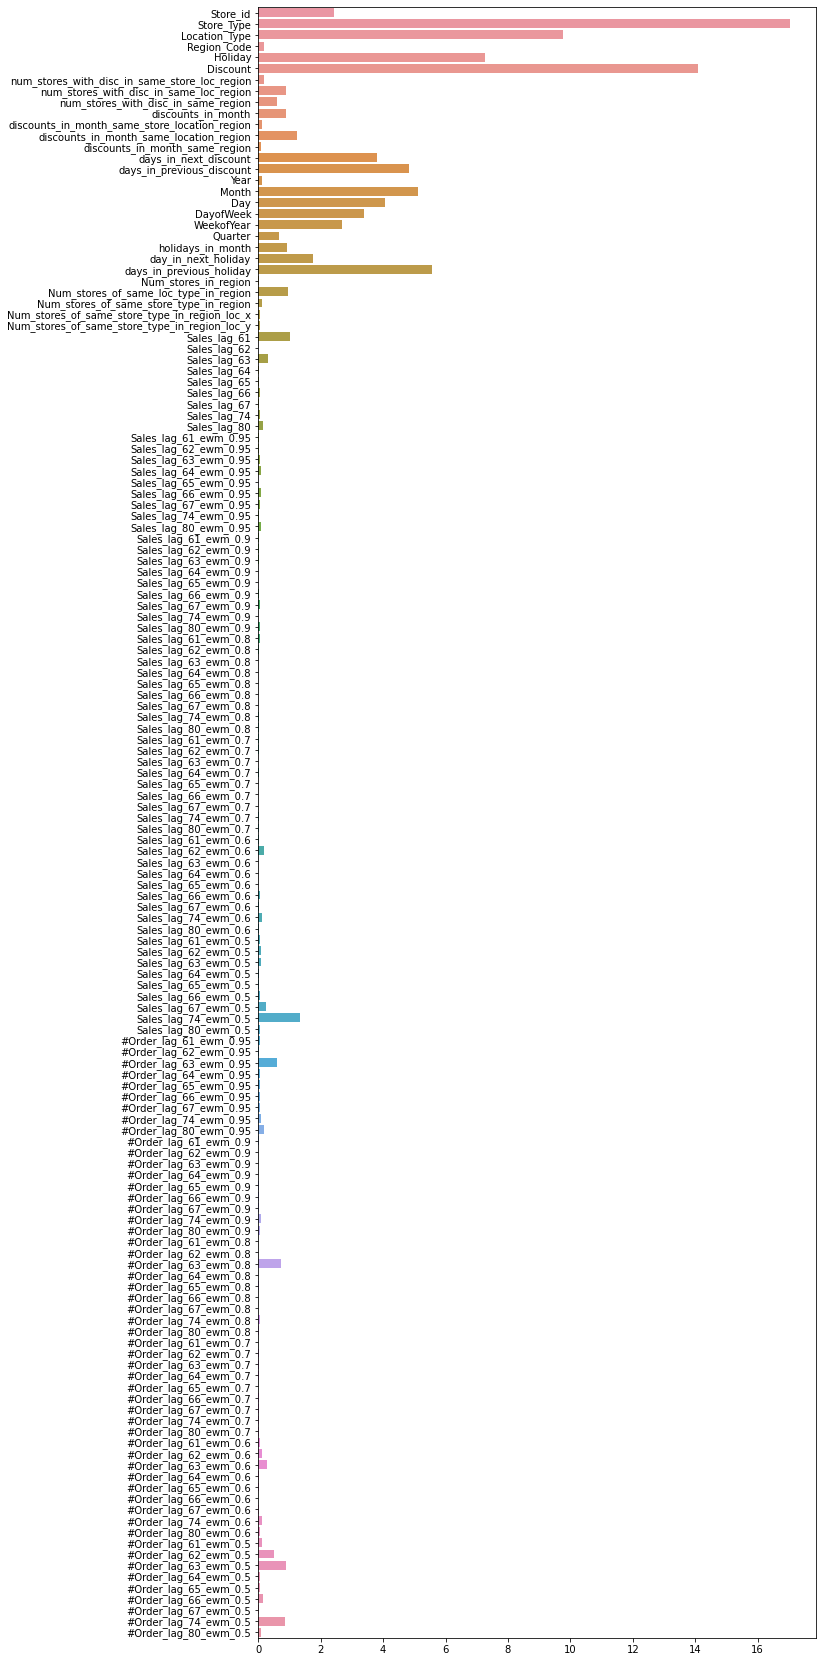

In [97]:
fig, ax = plt.subplots(figsize=(10, 30))
sns.barplot(cat_rg2.feature_importances_, feats, ax=ax)
plt.show()

In [98]:
test_preds = np.clip(cat_rg2.predict(test_df[feats]), a_min=0, a_max=None)

In [99]:
sub_df = test_df[['ID']].copy().reset_index(drop=True)

In [100]:
sub_df['Sales'] = np.exp(test_preds)

In [101]:
sub_df['Sales'].describe()

count     22265.000000
mean      43141.819981
std       15584.921342
min        7985.864980
25%       32164.460305
50%       40293.789916
75%       51101.802381
max      139343.437169
Name: Sales, dtype: float64

<AxesSubplot:>

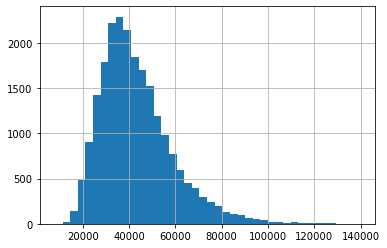

In [102]:
sub_df['Sales'].hist(bins=40)

In [103]:
sub_df.to_csv('sub1.csv', index=False)